In [335]:
import datetime
import pytz

# Get the current time in UTC and convert to IST
ist_timezone = pytz.timezone("Asia/Kolkata")
ist_now = datetime.datetime.now(pytz.utc).astimezone(ist_timezone)

# Print the time in IST
print(f"Notebook last run (end-to-end): {ist_now.strftime('%Y-%m-%d %H:%M:%S %Z')}")


Notebook last run (end-to-end): 2025-02-18 17:41:27 IST


In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [338]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [339]:
print("Dataset Shape:", df.shape)

Dataset Shape: (180, 9)


In [340]:
print("\nColumn Data Types:\n", df.dtypes)


Column Data Types:
 Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [342]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [343]:
df.duplicated().sum()

0

In [344]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [345]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


1. Customers age between 18 and 50
2. Education between 12 years - 21 years
3. Usage between 2-7 times a week
4. Fitness rating of customers lie between 1-5
5. Customers income range from 29k - 104k
6. Miles covered range from 21-360 each week
7. Majorty Male customers
8. KP281 is highly sold product
9. Majorty customers are Partnered

In [346]:
df_o = list(df.columns[df.dtypes=='object'])
df_o

['Product', 'Gender', 'MaritalStatus']

In [347]:
df[df_o].describe().T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [348]:
df_num = list(df.columns[df.dtypes!='object'])
df_num

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [349]:
df[df_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


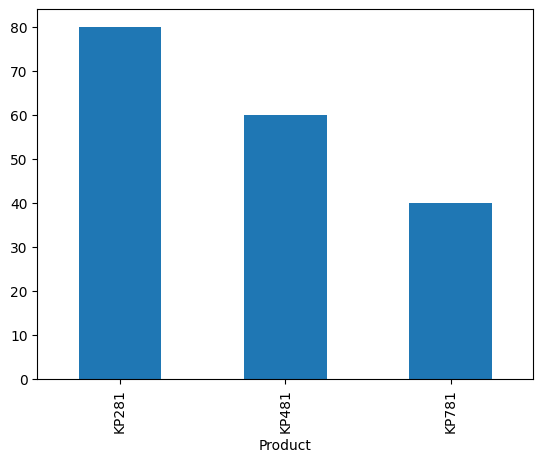

In [350]:
# Product value count and plots for comparision.
product_counts = df['Product'].value_counts()
print(product_counts)
product_counts.plot(kind='bar')
plt.show()

KP281 is the most sold and KP781 is the least sold.

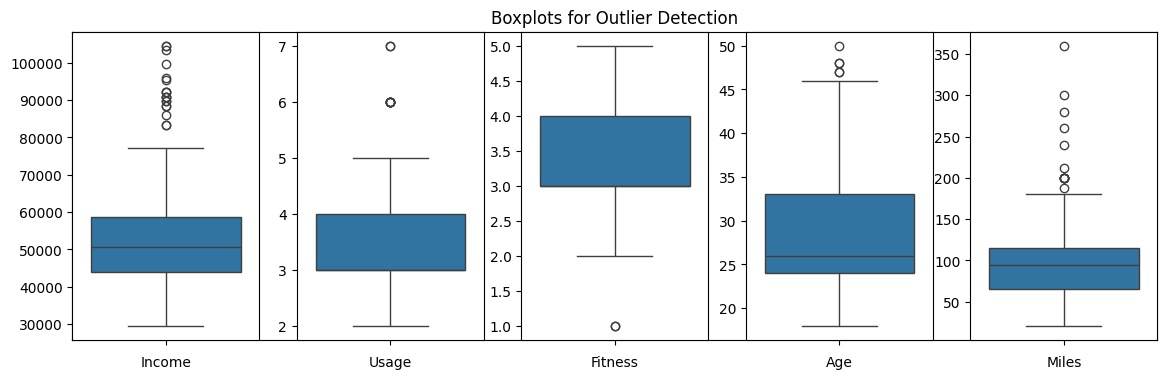

In [351]:
plt.figure(figsize=(14, 4))
plt.title("Boxplots for Outlier Detection")
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,1)
sns.boxplot(y='Income', data= df)
plt.xlabel('Income')
plt.ylabel('')

plt.subplot(1,5,2)
sns.boxplot(y = 'Usage', data = df)
plt.xlabel('Usage')
plt.ylabel('')

plt.subplot(1,5,3)
sns.boxplot(y = 'Fitness', data = df)
plt.xlabel('Fitness')
plt.ylabel('')

plt.subplot(1,5,4)
sns.boxplot(y='Age', data= df)
plt.xlabel('Age')
plt.ylabel('')

plt.subplot(1,5,5)
sns.boxplot(y = 'Miles', data=df)
plt.xlabel('Miles')
plt.ylabel('')

plt.show()

In [352]:
Age_freq = df['Age'].value_counts()
Usage_freq = df['Usage'].value_counts()
Fitness_freq = df['Fitness'].value_counts()
Income_freq = df['Income'].value_counts()
Miles_freq = df['Miles'].value_counts()

2

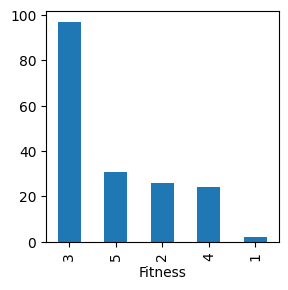

In [353]:
plt.figure(figsize=(3, 3))
Fitness_freq.plot(kind = 'bar')
Fitness_freq[1]

<Axes: xlabel='Age'>

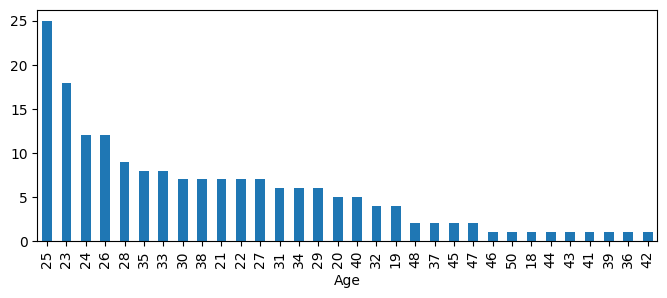

In [354]:
plt.figure(figsize=(8,3))
Age_freq.plot(kind = 'bar')

<Axes: xlabel='Usage'>

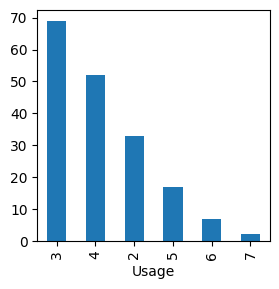

In [355]:
plt.figure(figsize=(3,3))
Usage_freq.plot(kind = 'bar')

<Axes: xlabel='Income'>

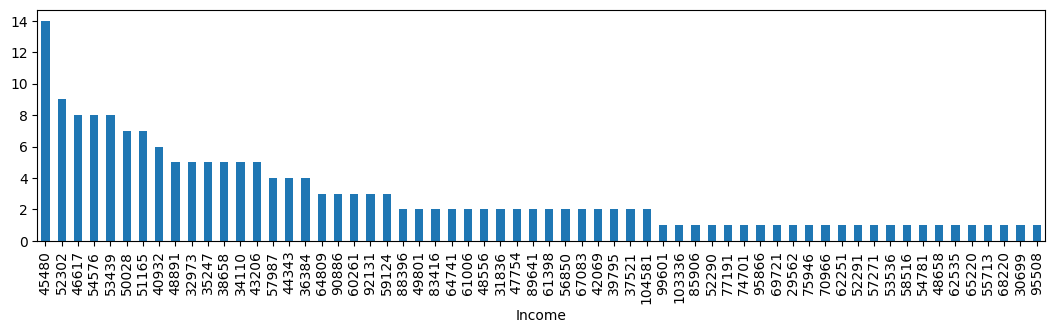

In [356]:
plt.figure(figsize=(13,3))
Income_freq.plot(kind = 'bar')

<Axes: xlabel='Miles'>

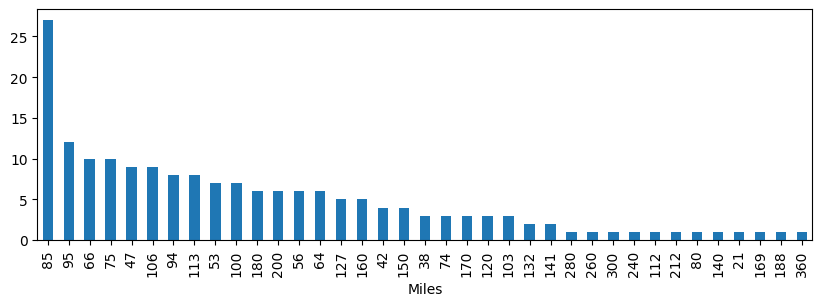

In [357]:
plt.figure(figsize=(10,3))
Miles_freq.plot(kind = 'bar')

 From the count plots and boxplots the outliers points are in low number, So removing outliers in Age, Usage, Fitness, Income, Miles Columns

In [358]:
# Clipping outliers between 5th and 95th percentile
for col in ['Age', 'Income', 'Usage', 'Fitness', 'Miles']:
    lower, upper = np.percentile(df[col], [5, 95])
    df[col] = np.clip(df[col], lower, upper)

In [359]:
df.shape

(180, 9)

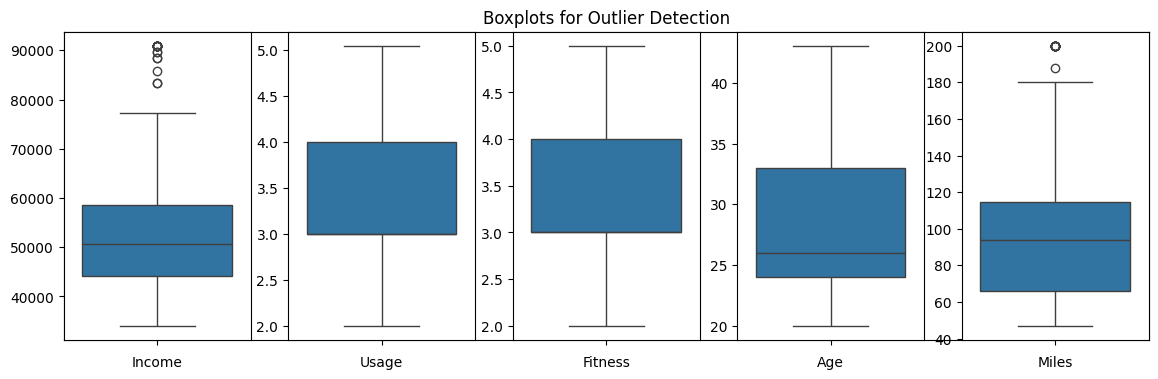

In [360]:
# Plotting Boxplot again for verification
plt.figure(figsize=(14, 4))
plt.title("Boxplots for Outlier Detection")
plt.xticks([])
plt.yticks([])

plt.subplot(1,5,1)
sns.boxplot(y='Income', data= df)
plt.xlabel('Income')
plt.ylabel('')

plt.subplot(1,5,2)
sns.boxplot(y = 'Usage', data = df)
plt.xlabel('Usage')
plt.ylabel('')

plt.subplot(1,5,3)
sns.boxplot(y = 'Fitness', data = df)
plt.xlabel('Fitness')
plt.ylabel('')

plt.subplot(1,5,4)
sns.boxplot(y='Age', data= df)
plt.xlabel('Age')
plt.ylabel('')

plt.subplot(1,5,5)
sns.boxplot(y = 'Miles', data=df)
plt.xlabel('Miles')
plt.ylabel('')

plt.show()

Outliers shown in the above plot are the points according to standard IQR i.e. above (Q3 + 1.5 * IQR)

<Axes: xlabel='count', ylabel='Age'>

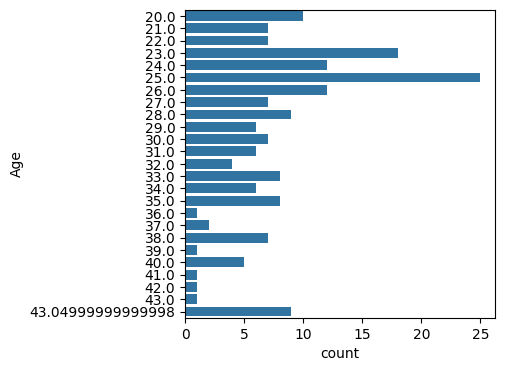

In [361]:
plt.figure(figsize=(4,4))
sns.countplot(y='Age', data = df)

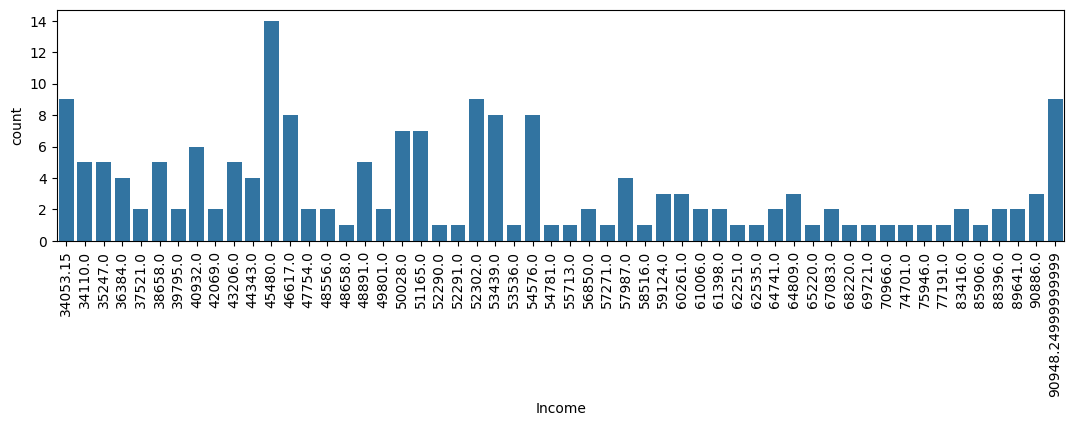

In [362]:
plt.figure(figsize=(13,3))
sns.countplot(x='Income', data = df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='Usage'>

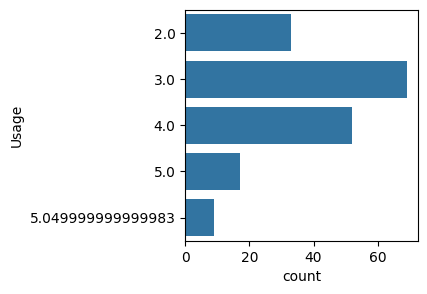

In [363]:
plt.figure(figsize=(3,3))
sns.countplot(y='Usage', data = df)

<Axes: xlabel='Fitness', ylabel='count'>

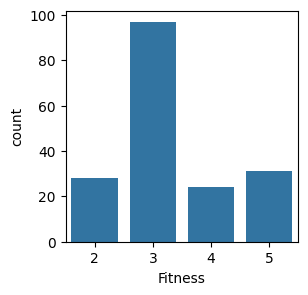

In [364]:
plt.figure(figsize=(3,3))
sns.countplot(x='Fitness', data = df)

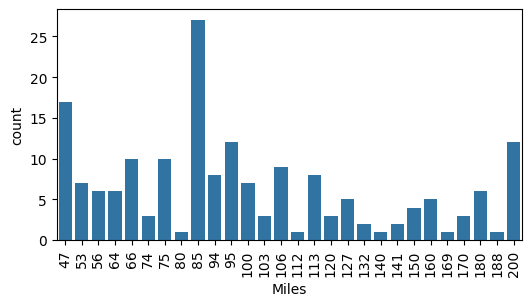

In [365]:
plt.figure(figsize=(6,3))
sns.countplot(x='Miles', data = df)
plt.xticks(rotation=90)
plt.show()

From the above countplots we can be sure that we have clipped between 5 to 95 %ile successfully.

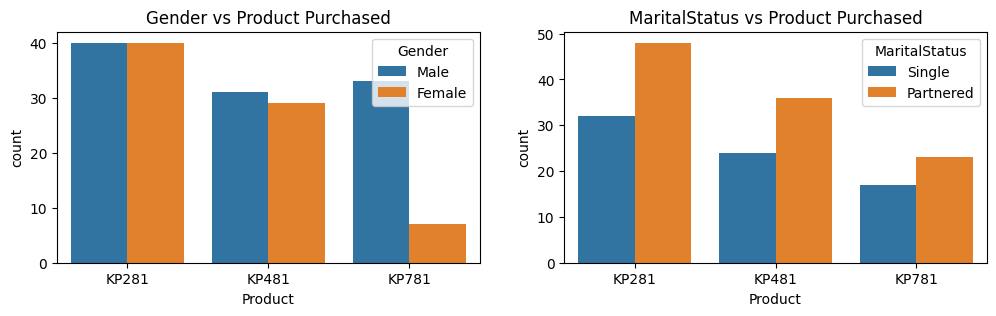

In [366]:
# Categorical Analysis

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
sns.countplot(x='Product', hue="Gender", data=df)
plt.title(f"Gender vs Product Purchased")

plt.subplot(1,2,2)
sns.countplot(x='Product', hue="MaritalStatus", data=df)
plt.title(f"MaritalStatus vs Product Purchased")

plt.show()

For all of the three products, Partnered are more than single.

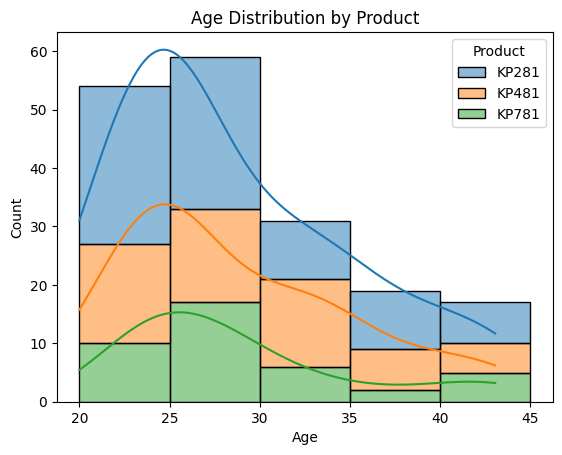

In [367]:
# Continuous Analysis

sns.histplot(data=df, x="Age", hue="Product", multiple="stack", bins=range(int(min(df['Age'])), int(max(df['Age'])) + 5, 5),kde =True)
plt.title("Age Distribution by Product")
plt.show()

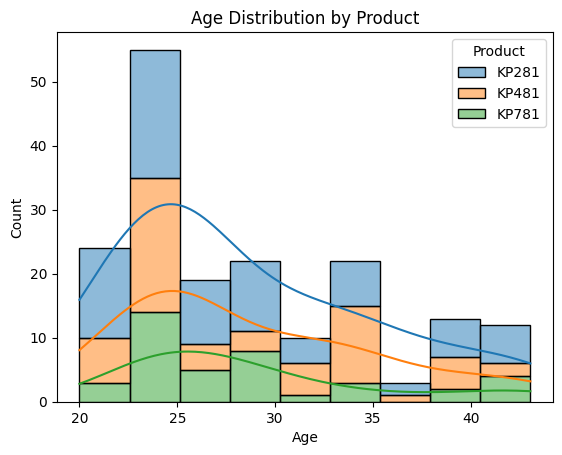

In [368]:
sns.histplot(data=df, x="Age", hue="Product", multiple="stack", kde =True)
plt.title("Age Distribution by Product")
plt.show()

for all of the three products, Majority customers belong to 23 and 25yrs age group.

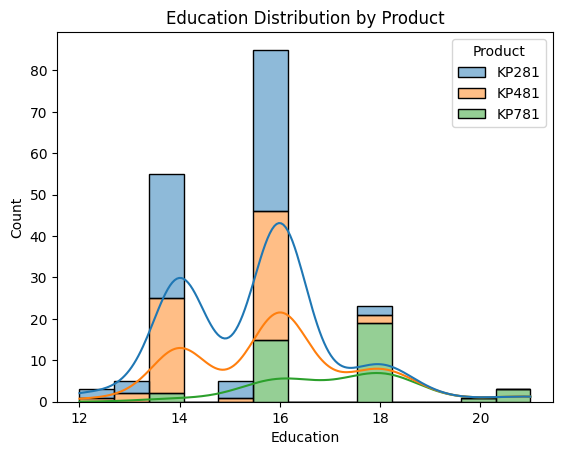

In [369]:
sns.histplot(data=df, x="Education", hue="Product", multiple="stack", kde =True)
plt.title("Education Distribution by Product")
plt.show()

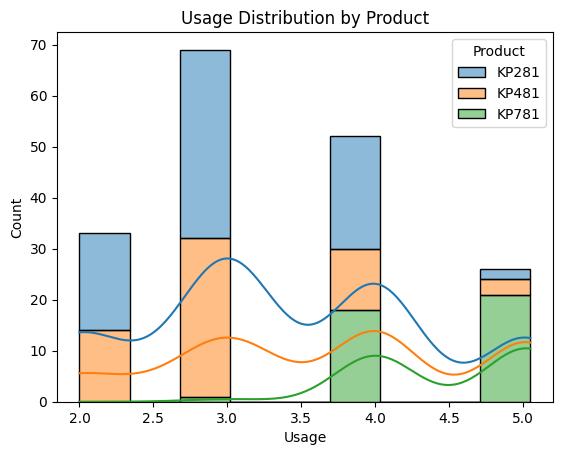

In [370]:
sns.histplot(data=df, x="Usage", hue="Product", multiple="stack", kde =True)
plt.title("Usage Distribution by Product")
plt.show()

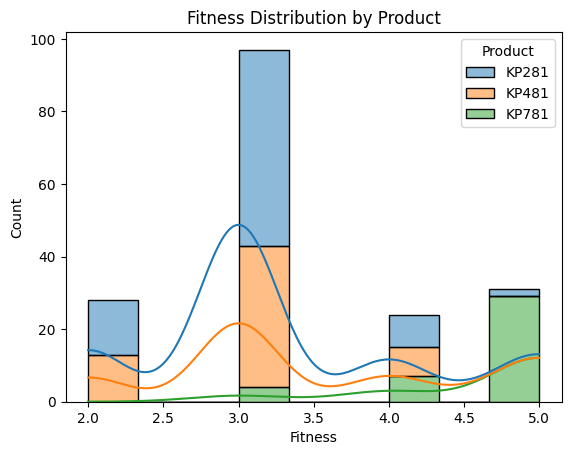

In [371]:
sns.histplot(data=df, x="Fitness", hue="Product", multiple="stack", kde =True)
plt.title("Fitness Distribution by Product")
plt.show()

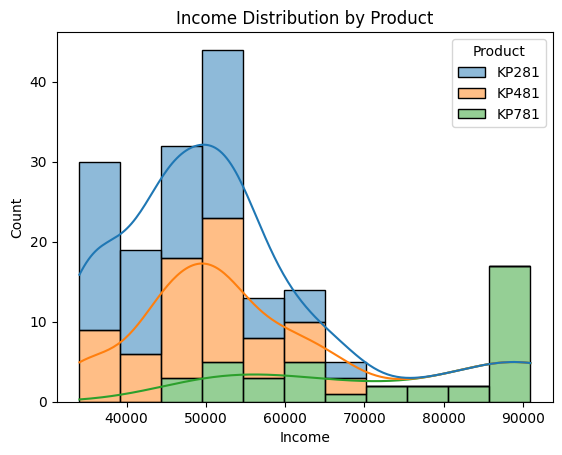

In [372]:
sns.histplot(data=df, x="Income", hue="Product", multiple="stack", kde =True)
plt.title("Income Distribution by Product")
plt.show()

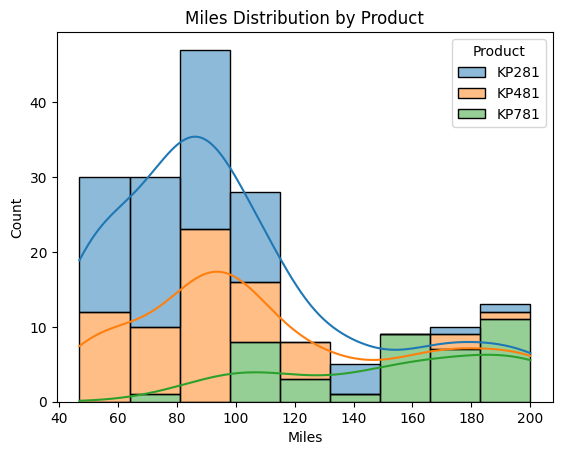

In [373]:
sns.histplot(data=df, x="Miles", hue="Product", multiple="stack", kde =True)
plt.title("Miles Distribution by Product")
plt.show()

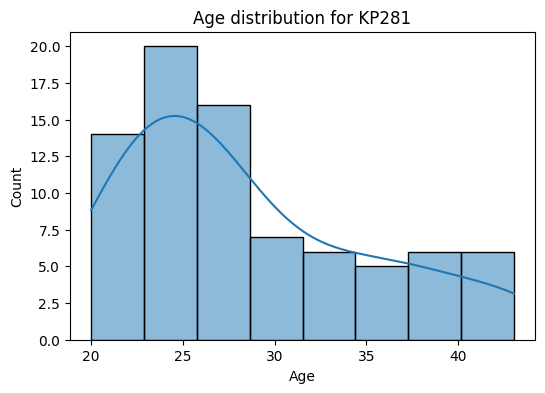

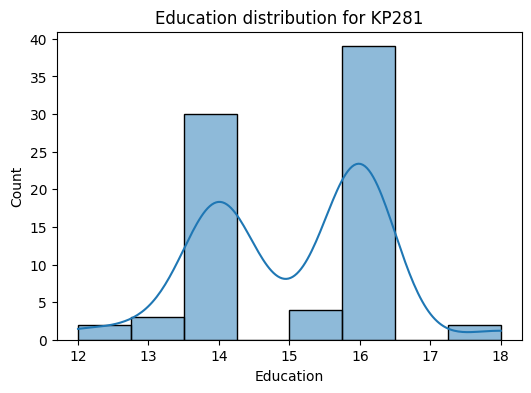

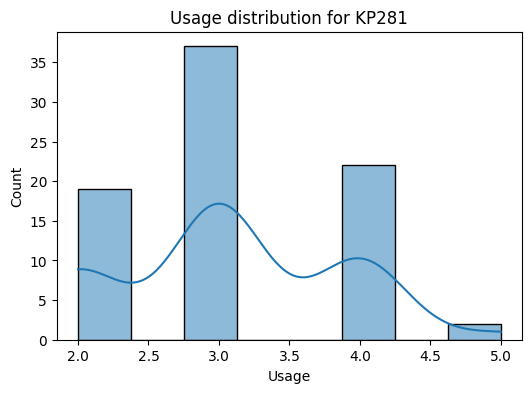

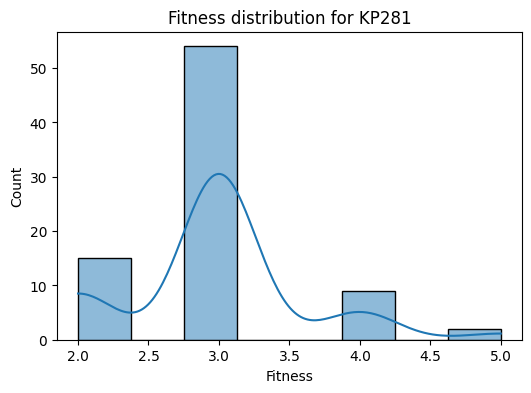

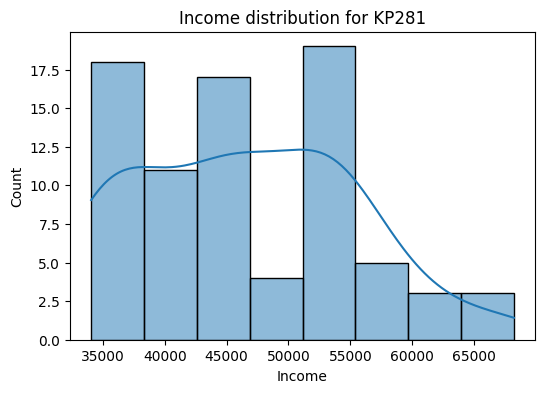

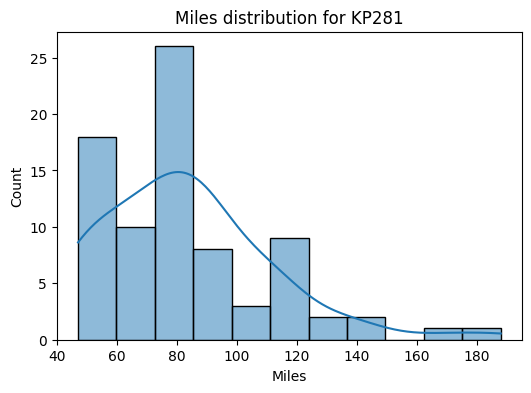

In [374]:
for i in df_num:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[df['Product'] == 'KP281'][df_num],x=i,kde=True)
    plt.title(f'{i} distribution for KP281')
    plt.show()

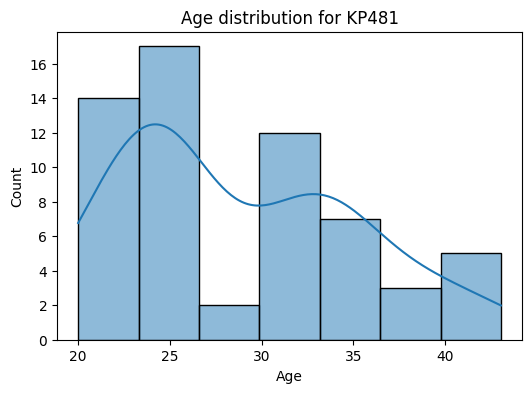

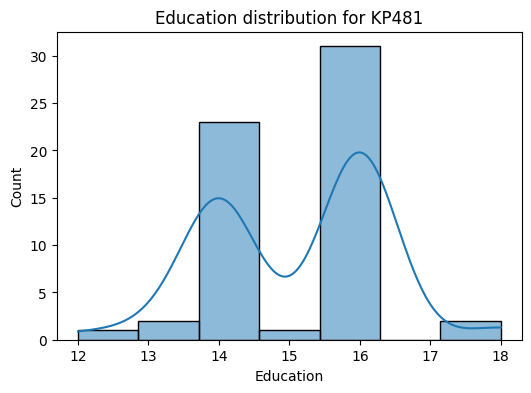

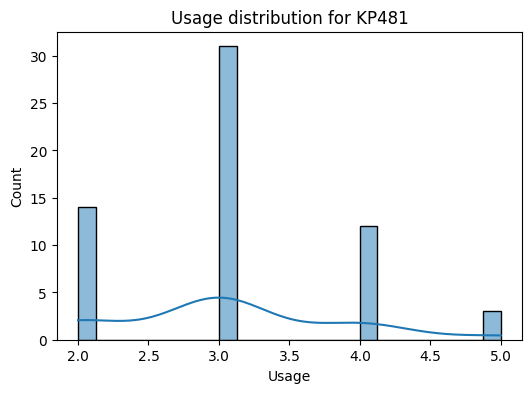

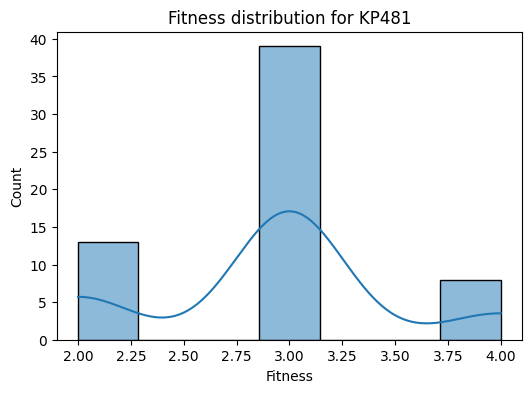

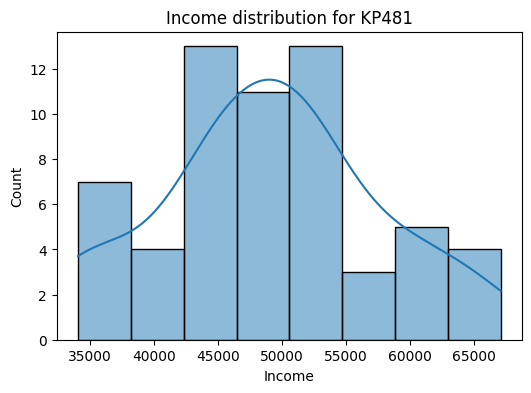

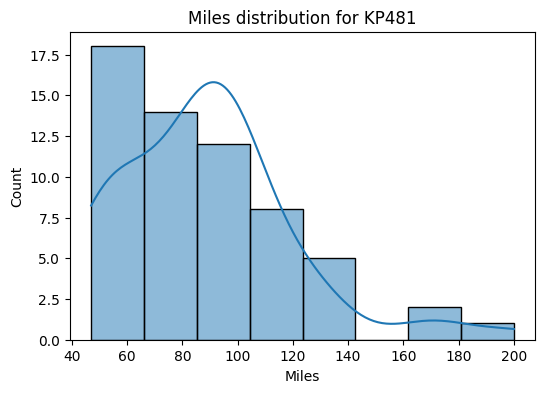

In [375]:
for i in df_num:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[df['Product'] == 'KP481'][df_num],x=i,kde=True)
    plt.title(f'{i} distribution for KP481')
    plt.show()

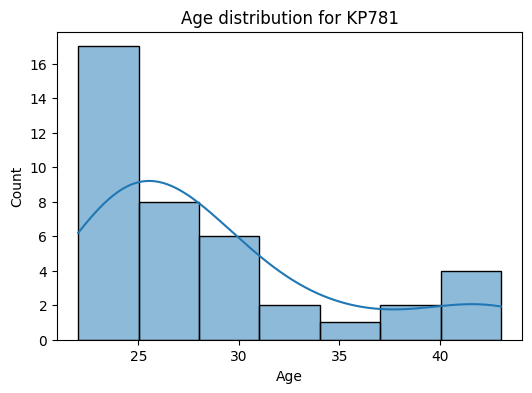

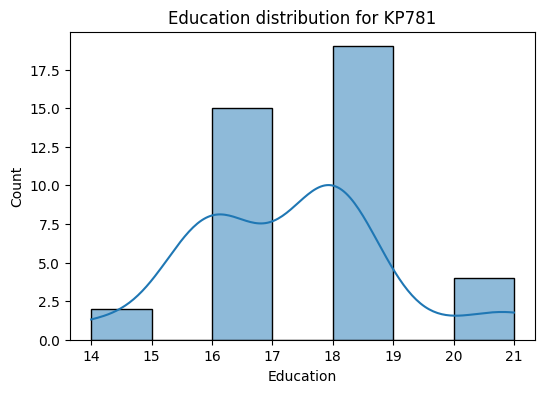

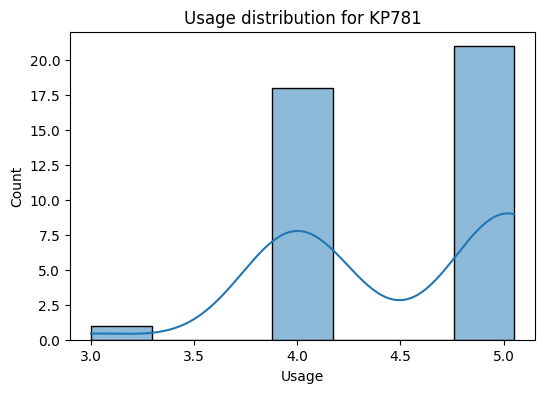

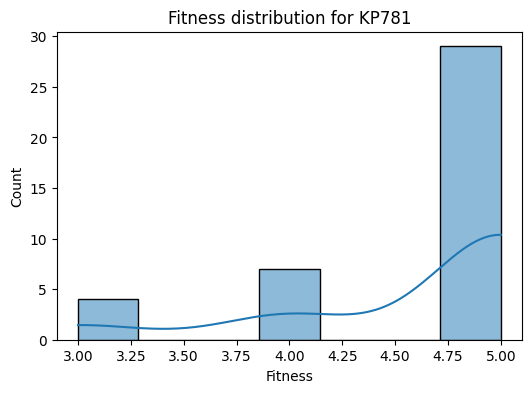

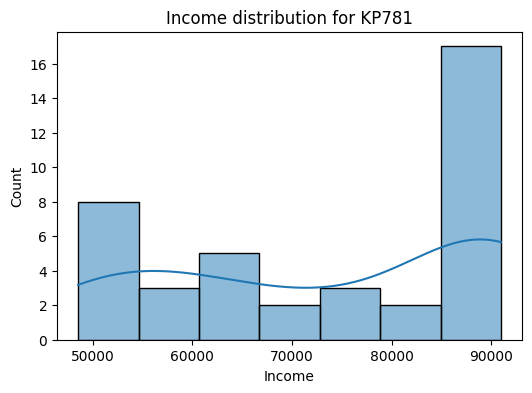

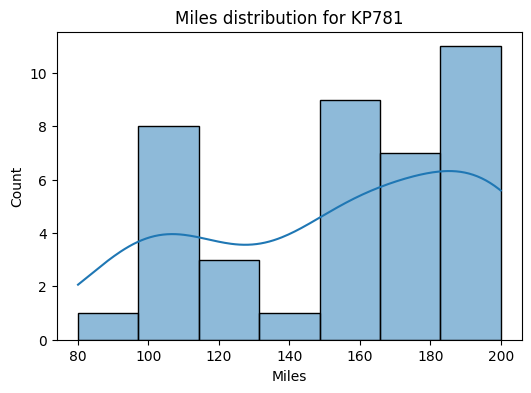

In [376]:
for i in df_num:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df[df['Product'] == 'KP781'][df_num],x=i,kde=True)
    plt.title(f'{i} distribution for KP781')
    plt.show()

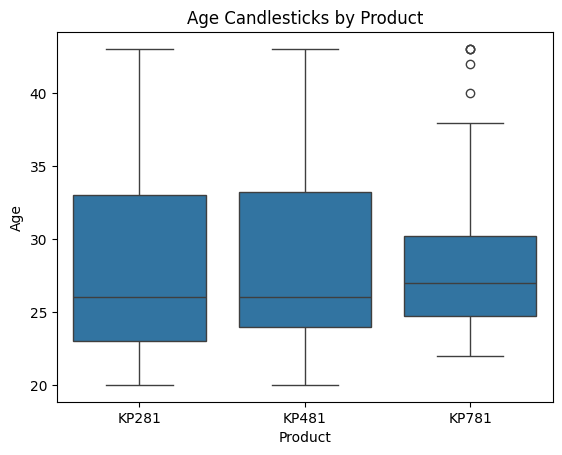

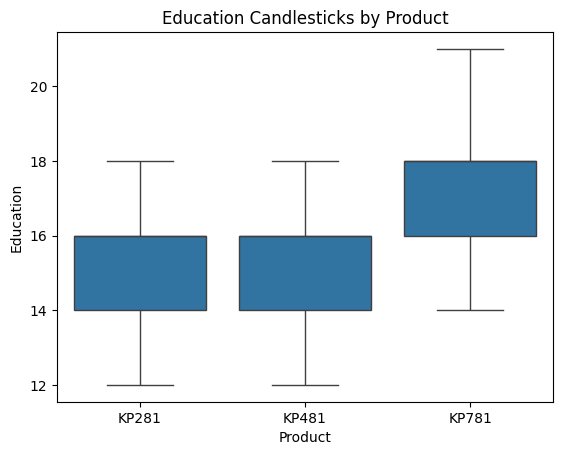

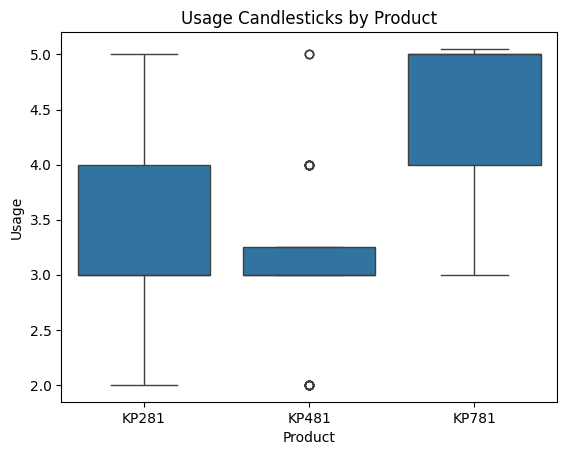

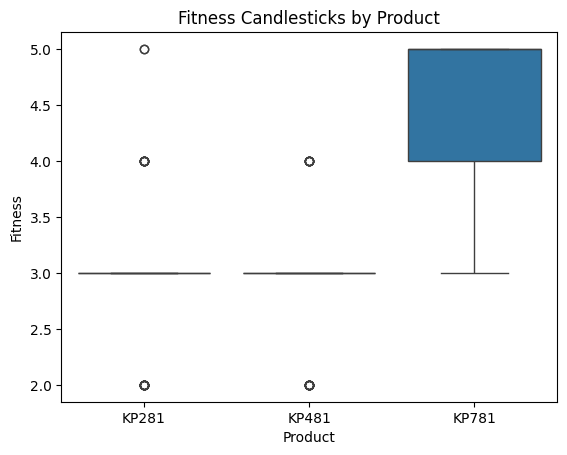

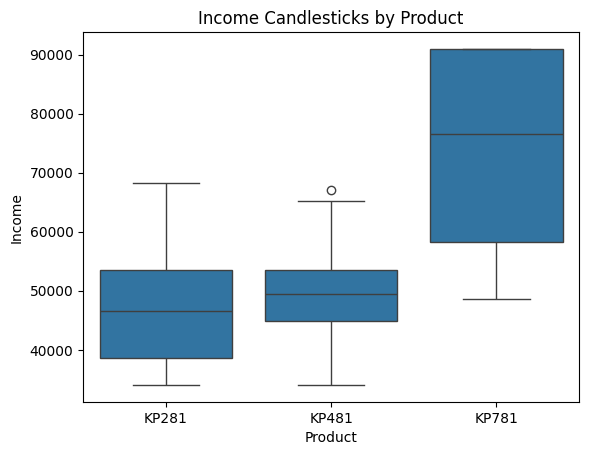

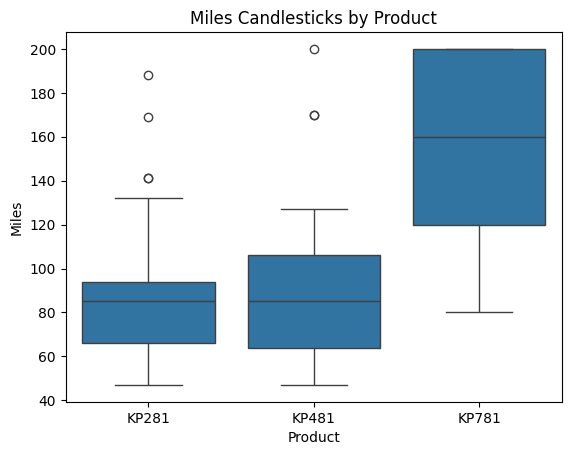

In [377]:
for i in df_num:
  sns.boxplot(x='Product', y=i, data=df)
  plt.title(f"{i} Candlesticks by Product")
  plt.show()

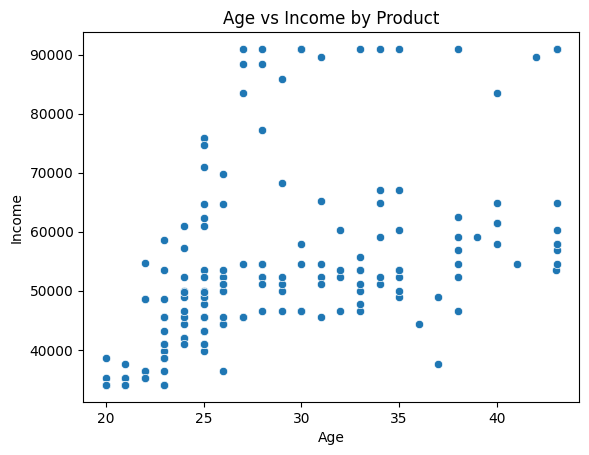

In [378]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title("Age vs Income by Product")
plt.show()

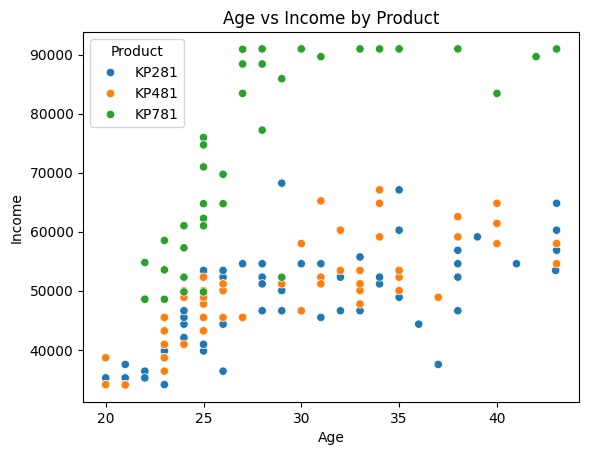

In [379]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df)
plt.title("Age vs Income by Product")
plt.show()

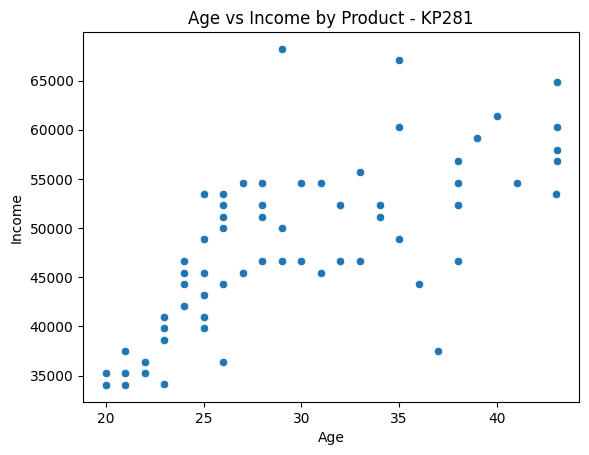

In [380]:
sns.scatterplot(x='Age', y='Income', data=df[df['Product'] == 'KP281'])
plt.title("Age vs Income by Product - KP281")
plt.show()

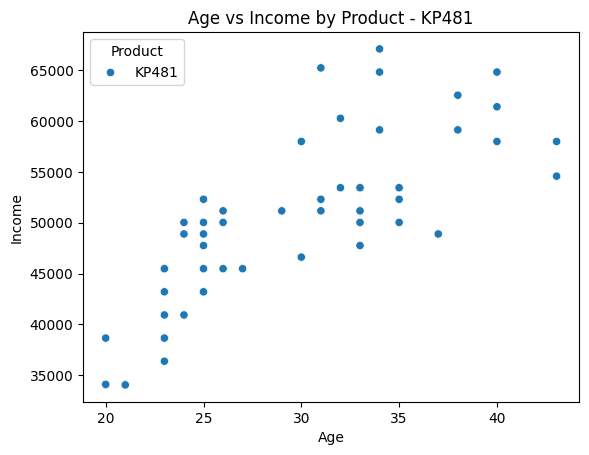

In [381]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df[df['Product'] == 'KP481'])
plt.title("Age vs Income by Product - KP481")
plt.show()

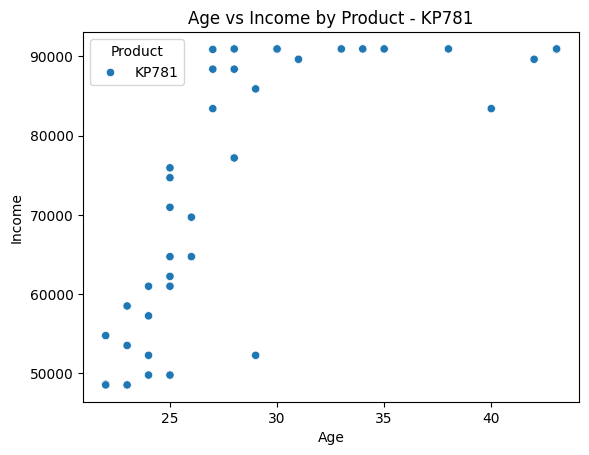

In [382]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df[df['Product'] == 'KP781'])
plt.title("Age vs Income by Product - KP781")
plt.show()

                              Age  Education     Usage   Fitness    Income  \
Age                      1.000000   0.279533  0.015394  0.057361  0.514362   
Education                0.279533   1.000000  0.388802  0.430480  0.628908   
Usage                    0.015394   0.388802  1.000000  0.661978  0.481608   
Fitness                  0.057361   0.430480  0.661978  1.000000  0.546998   
Income                   0.514362   0.628908  0.481608  0.546998  1.000000   
Miles                    0.029636   0.367262  0.771030  0.826307  0.537297   
Product_KP281           -0.029760  -0.296591 -0.291333 -0.332207 -0.399793   
Product_KP481            0.017630  -0.199761 -0.245825 -0.306755 -0.203157   
Product_KP781            0.015579   0.581002  0.626949  0.744891  0.708203   
Gender_Female           -0.027288  -0.094089 -0.213916 -0.258551 -0.203453   
Gender_Male              0.027288   0.094089  0.213916  0.258551  0.203453   
MaritalStatus_Partnered  0.184322   0.068569 -0.037195 -0.054196

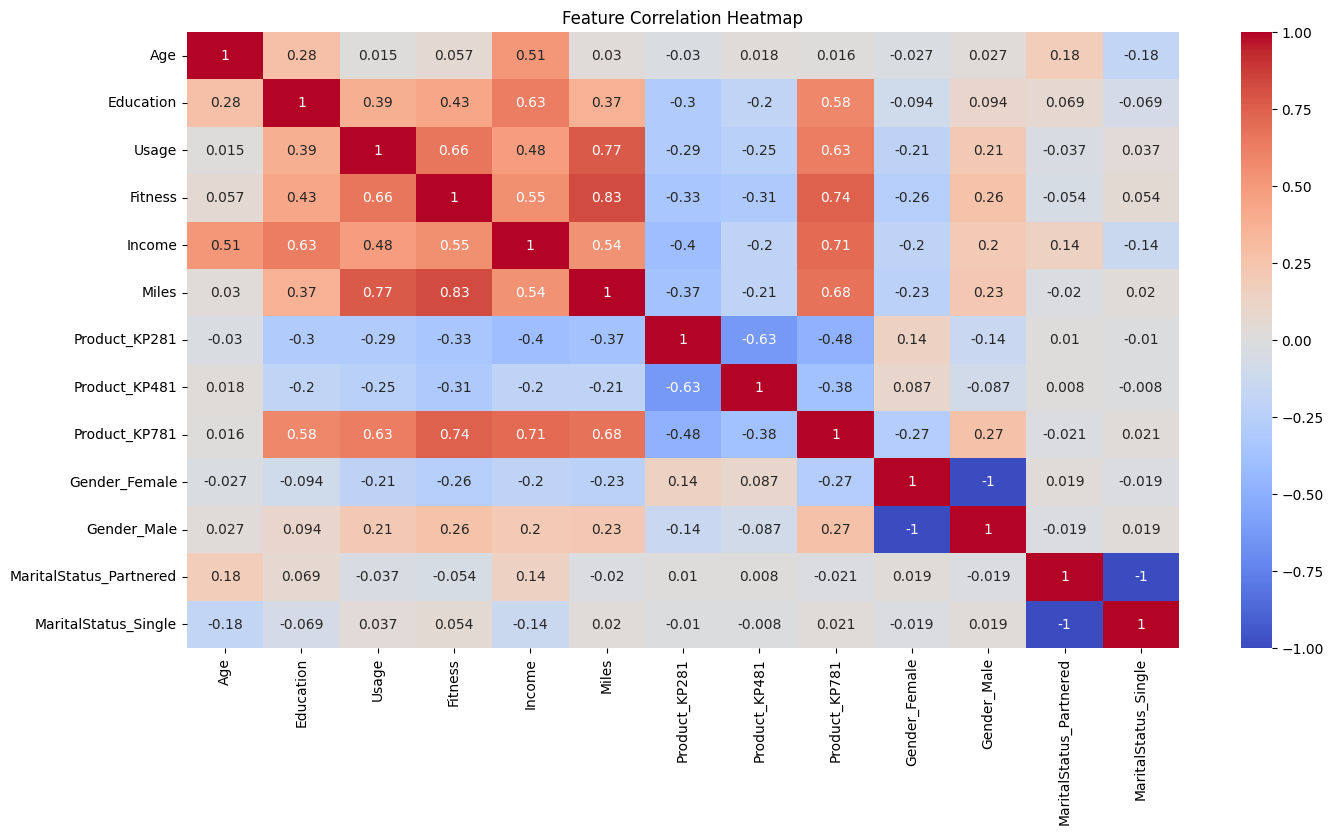

In [383]:
# --------------------------------------
# Correlation Analysis
# --------------------------------------

df_d = pd.get_dummies(df)
plt.figure(figsize=(16,8))
print(df_d.corr())
sns.heatmap(df_d.corr(),annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Considering all Products

1. **Product_KP781** has strong positive correlations with:
   - **Education**: Suggests that customers with higher education are more likely to purchase Product_KP781.
   - **Usage**: Indicates a strong tendency for frequent users to prefer Product_KP781.
   - **Fitness**: A very strong positive correlation showing that customers who are more fitness-oriented are more likely to buy Product_KP781.
   - **Income**: High-income customers tend to purchase Product_KP781.
   - **Miles**: Customers who drive more (higher mileage) show a preference for Product_KP781.

2. **Miles** has strong positive correlations with:
   - **Usage**: Suggests that customers with higher usage are more likely to have higher mileage.
   - **Fitness**: A strong correlation indicating that more active individuals (fitness enthusiasts) tend to drive more.

3. **Income** shows positive correlations with:
   - **Education**: Higher-income individuals tend to be better educated.
   - **Fitness**: Income is moderately correlated with fitness levels, indicating wealthier customers may invest in fitness.
   - **Miles**: Wealthier individuals are more likely to drive more.

**Summary:**  
There are several strong positive correlations related to **Product_KP781**, **Income**, and **Fitness**. The strongest correlations suggest that educated, active, and higher-income customers are more likely to purchase Product_KP781 and drive more miles.



                              Age  Education     Usage   Fitness    Income  \
Age                      1.000000   0.331778 -0.024080  0.056197  0.749160   
Education                0.331778   1.000000  0.169369  0.132137  0.442348   
Usage                   -0.024080   0.169369  1.000000  0.487678 -0.053832   
Fitness                  0.056197   0.132137  0.487678  1.000000 -0.000276   
Income                   0.749160   0.442348 -0.053832 -0.000276  1.000000   
Miles                   -0.056465   0.113489  0.639829  0.834460 -0.040509   
Product_KP281                 NaN        NaN       NaN       NaN       NaN   
Gender_Female           -0.033715   0.051706 -0.241090 -0.158238 -0.051767   
Gender_Male              0.033715  -0.051706  0.241090  0.158238  0.051767   
MaritalStatus_Partnered  0.179281   0.088657 -0.072178 -0.193801  0.189742   
MaritalStatus_Single    -0.179281  -0.088657  0.072178  0.193801 -0.189742   

                            Miles  Product_KP281  Gender_Female

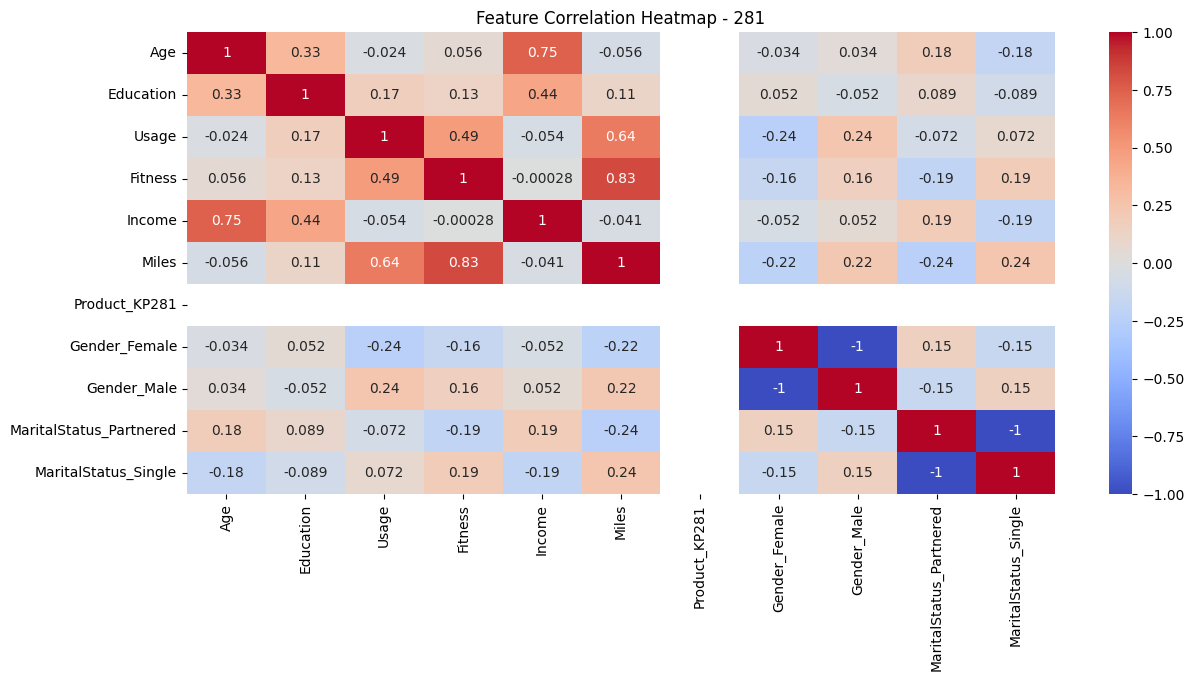

In [384]:
df_d_281 = pd.get_dummies(df[df['Product'] == 'KP281'])
plt.figure(figsize=(14,6))
print(df_d_281.corr())
sns.heatmap(df_d_281.corr(),annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap - 281")
plt.show()

### Considering Product KP281.

1. **Income** has a strong positive correlation with:
   - **Age**: Older individuals tend to have higher income.
   - **Education**: Higher income is linked with higher education levels.
   
2. **Miles** shows positive correlations with:
   - **Usage**: More vehicle usage is correlated with higher mileage.
   - **Fitness**: Higher fitness levels tend to correlate with higher mileage.
   - **Gender_Male**: Males tend to drive more miles than females.
   
3. **Education** has positive correlations with:
   - **Usage**: Higher education correlates with more vehicle usage.
   - **Income**: Higher education levels are associated with higher income.

4. **Fitness** is positively correlated with:
   - **Usage**: More fitness-oriented individuals tend to use their vehicles more.
   - **Miles**: People with higher fitness levels tend to drive longer distances.

5. **Gender_Male** is positively correlated with:
   - **Miles**: Males tend to drive more miles.
   - **MaritalStatus_Single**: Single males tend to be correlated with more driving miles compared to their partnered counterparts.

6. **MaritalStatus_Partnered** has a positive correlation with:
   - **Age**: Older, partnered individuals may have more stable income and family-oriented driving needs.
   - **Income**: Married individuals tend to have slightly higher incomes.

**Summary:**
- **Income** is positively correlated with **Age** and **Education**, showing that older and more educated individuals tend to have higher incomes.
- **Miles** shows a positive relationship with **Usage**, **Fitness**, and **Gender_Male**, meaning those who drive more, are more fit, or are male, tend to log more miles.
- **Education** is positively correlated with **Usage** and **Income**, highlighting that educated individuals tend to use their vehicles more and earn higher income.
- **Fitness** correlates positively with both **Usage** and **Miles**, reflecting that fitness-conscious individuals are also more likely to drive more.
- **Gender_Male** and **Miles** both show a positive correlation, indicating that men tend to drive more miles.
- **MaritalStatus_Partnered** is positively correlated with **Age** and **Income**, suggesting that older, married individuals tend to have more financial stability and family-related driving habits.

                              Age  Education     Usage       Fitness  \
Age                      1.000000   0.480881 -0.057966 -1.379345e-02   
Education                0.480881   1.000000 -0.112105 -3.325191e-02   
Usage                   -0.057966  -0.112105  1.000000  3.349009e-01   
Fitness                 -0.013793  -0.033252  0.334901  1.000000e+00   
Income                   0.805669   0.537386  0.068440  4.356403e-02   
Miles                   -0.110937  -0.212675  0.666485  6.545779e-01   
Product_KP481                 NaN        NaN       NaN           NaN   
Gender_Female            0.046516   0.071986  0.086917 -3.321657e-02   
Gender_Male             -0.046516  -0.071986 -0.086917  3.321657e-02   
MaritalStatus_Partnered  0.239857   0.134700 -0.017160  3.627385e-18   
MaritalStatus_Single    -0.239857  -0.134700  0.017160 -1.330041e-17   

                           Income     Miles  Product_KP481  Gender_Female  \
Age                      0.805669 -0.110937            NaN

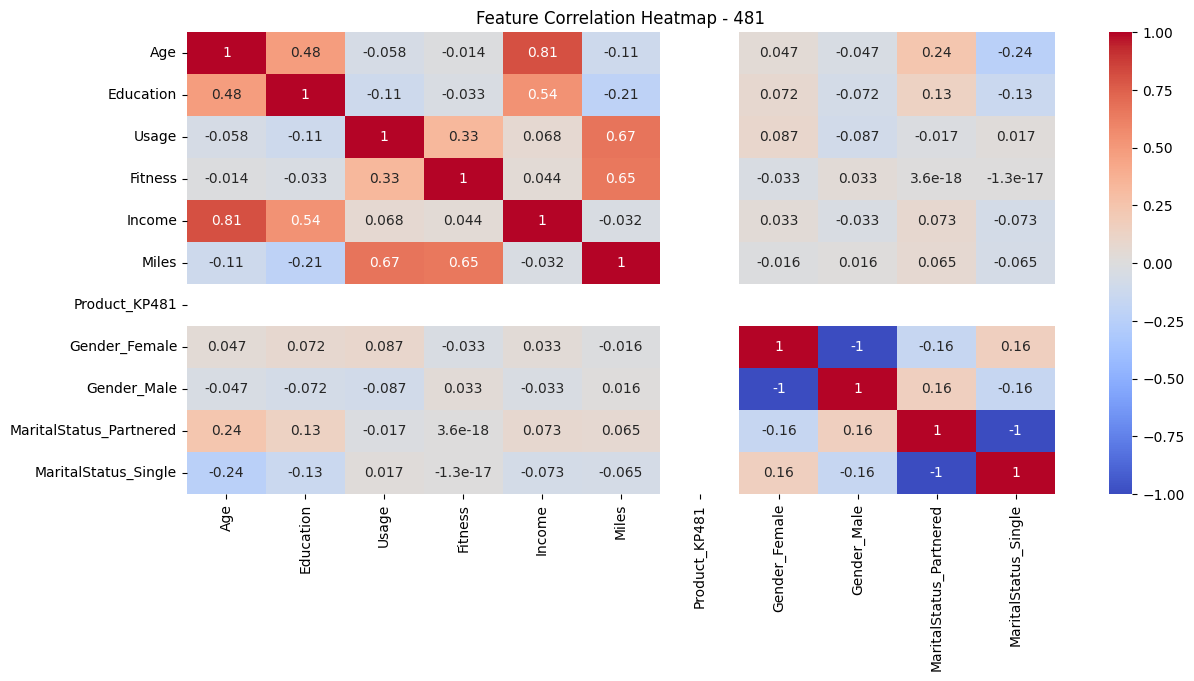

In [385]:
df_d_481 = pd.get_dummies(df[df['Product'] == 'KP481'])
plt.figure(figsize=(14,6))
print(df_d_481.corr())
sns.heatmap(df_d_481.corr(),annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap - 481")
plt.show()

### Considering Product KP 481.

1. **Income** is positively correlated with:
   - **Age**: Older individuals tend to have higher income.
   - **Education**: More educated individuals tend to have higher income.
   
2. **Miles** is positively correlated with:
   - **Usage**: Higher vehicle usage is linked to more miles driven.
   - **Fitness**: Individuals with higher fitness levels tend to drive longer distances.

3. **MaritalStatus_Partnered** has a positive correlation with:
   - **Age**: Older, partnered individuals may have more stable financial situations.
   - **Income**: Married individuals tend to have slightly higher incomes.
   
4. **Gender_Male** is positively correlated with:
   - **MaritalStatus_Partnered**: Males who are married tend to have a positive correlation with their partnered status.
   
5. **MaritalStatus_Single** is positively correlated with:
   - **Gender_Female**: Single females are positively correlated with being single.

**Summary:**
- **Income** is strongly positively correlated with both **Age** and **Education**, suggesting that older, more educated individuals tend to earn more.
- **Miles** shows a positive relationship with **Usage** and **Fitness**, meaning that more vehicle usage and better fitness levels are associated with higher mileage.
- **MaritalStatus_Partnered** correlates with **Age** and **Income**, suggesting that older and married individuals tend to have higher income.
- **Gender_Male** has a positive correlation with **MaritalStatus_Partnered**, meaning that married males are more likely to be partnered.
- **MaritalStatus_Single** has a positive correlation with **Gender_Female**, as single females tend to be associated with this status.

                              Age  Education     Usage   Fitness    Income  \
Age                      1.000000   0.177095  0.242749  0.210078  0.713677   
Education                0.177095   1.000000  0.015321 -0.166991  0.247132   
Usage                    0.242749   0.015321  1.000000  0.177927  0.281153   
Fitness                  0.210078  -0.166991  0.177927  1.000000  0.098803   
Income                   0.713677   0.247132  0.281153  0.098803  1.000000   
Miles                    0.315689  -0.069943  0.529648  0.438977  0.307018   
Product_KP781                 NaN        NaN       NaN       NaN       NaN   
Gender_Female           -0.135477   0.151433  0.179282 -0.037436 -0.032253   
Gender_Male              0.135477  -0.151433 -0.179282  0.037436  0.032253   
MaritalStatus_Partnered  0.114199   0.078899  0.053558  0.124690  0.392635   
MaritalStatus_Single    -0.114199  -0.078899 -0.053558 -0.124690 -0.392635   

                            Miles  Product_KP781  Gender_Female

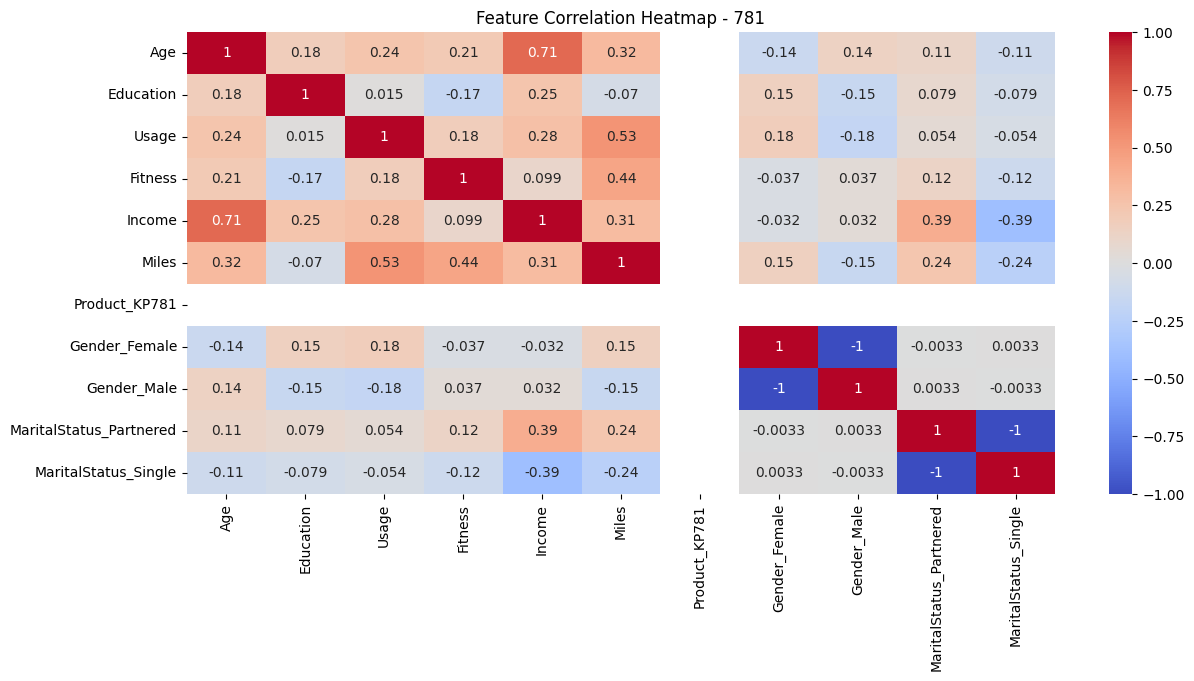

In [386]:
df_d_781 = pd.get_dummies(df[df['Product'] == 'KP781'])
plt.figure(figsize=(14,6))
print(df_d_781.corr())
sns.heatmap(df_d_781.corr(),annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap - 781")
plt.show()

### Considering Product KP 781.

1. **Income** is positively correlated with:
   - **Age**: Older individuals tend to have higher income, likely due to more experience and career progression.
   - **Education**: Higher education levels correlate with higher income, reflecting the impact of education on career and earnings.
   - **Usage**: Higher income is associated with more usage, which could relate to spending power for goods or services.
   - **Miles**: Higher income individuals may also drive more miles, possibly due to work or leisure activities.

2. **Miles** is positively correlated with:
   - **Age**: Older individuals tend to drive more miles, possibly due to commuting or other life patterns.
   - **Usage**: Increased usage leads to more miles driven.
   - **Fitness**: People who are more active or engaged in fitness activities may tend to drive more miles, possibly for trips related to fitness routines or hobbies.
   - **MaritalStatus_Partnered**: Married individuals may drive more miles, potentially due to family or joint activities.
  
3. **MaritalStatus_Partnered** is positively correlated with:
   - **Income**: Married individuals tend to have higher incomes, possibly due to dual-income households or more stable financial situations.
   - **Miles**: Partnered individuals are likely to drive more, possibly due to family-related travel or activities.

4. **Gender_Male** is positively correlated with:
   - **Miles**: Males tend to drive more miles compared to females, which could relate to lifestyle or work-related travel.

**Summary:**
- **Income** is positively linked with **Age**, **Education**, **Usage**, and **Miles**, suggesting that older, more educated individuals tend to earn more, use more services, and drive more.
- **Miles** shows a strong positive relationship with **Age**, **Usage**, **Fitness**, and **MaritalStatus_Partnered**, indicating that older individuals, those with higher usage, and partnered individuals tend to drive more.
- **MaritalStatus_Partnered** has a positive correlation with **Income** and **Miles**, indicating that married individuals often have higher income and may drive more miles.
- **Gender_Male** shows a positive correlation with **Miles**, reflecting a trend where males generally drive more.

### For all the products Income and Age are postively correlated

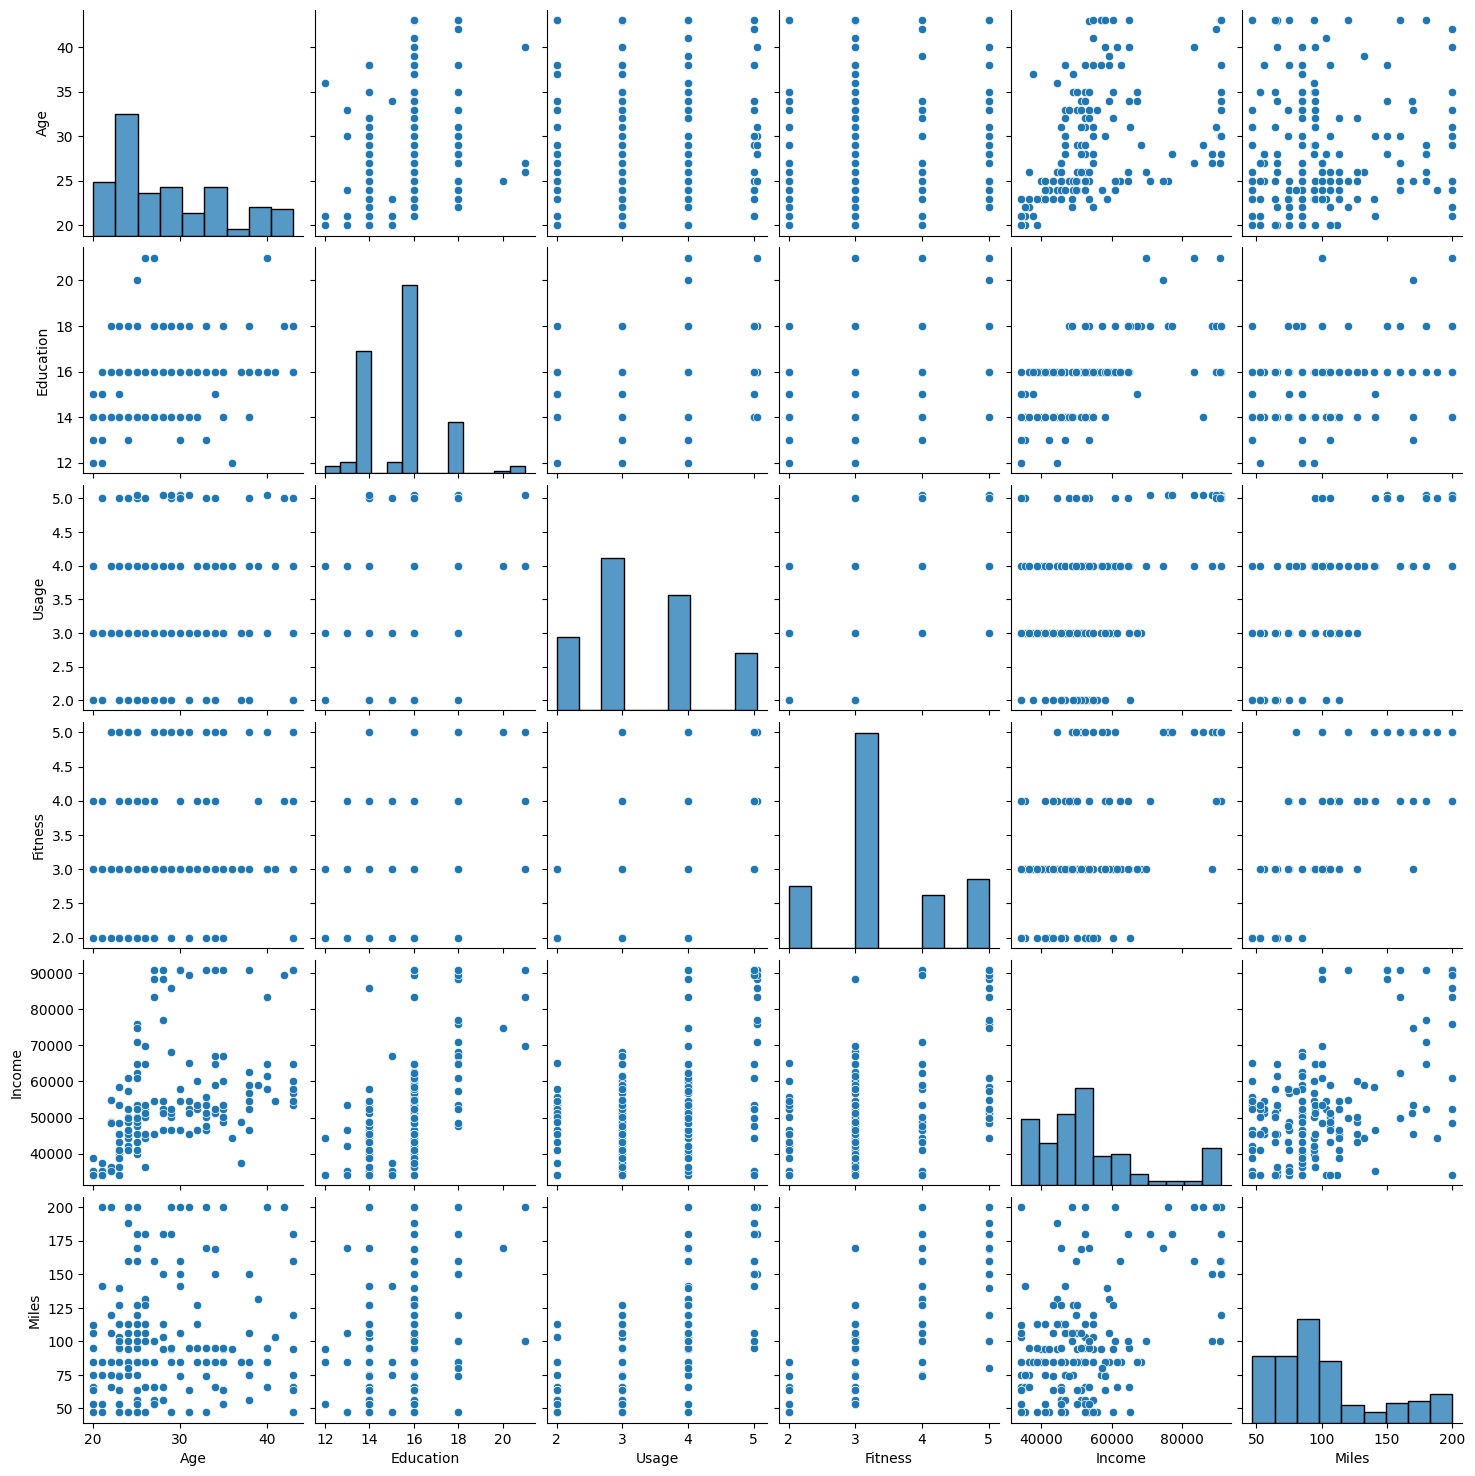

In [387]:
sns.pairplot(df)
plt.show()

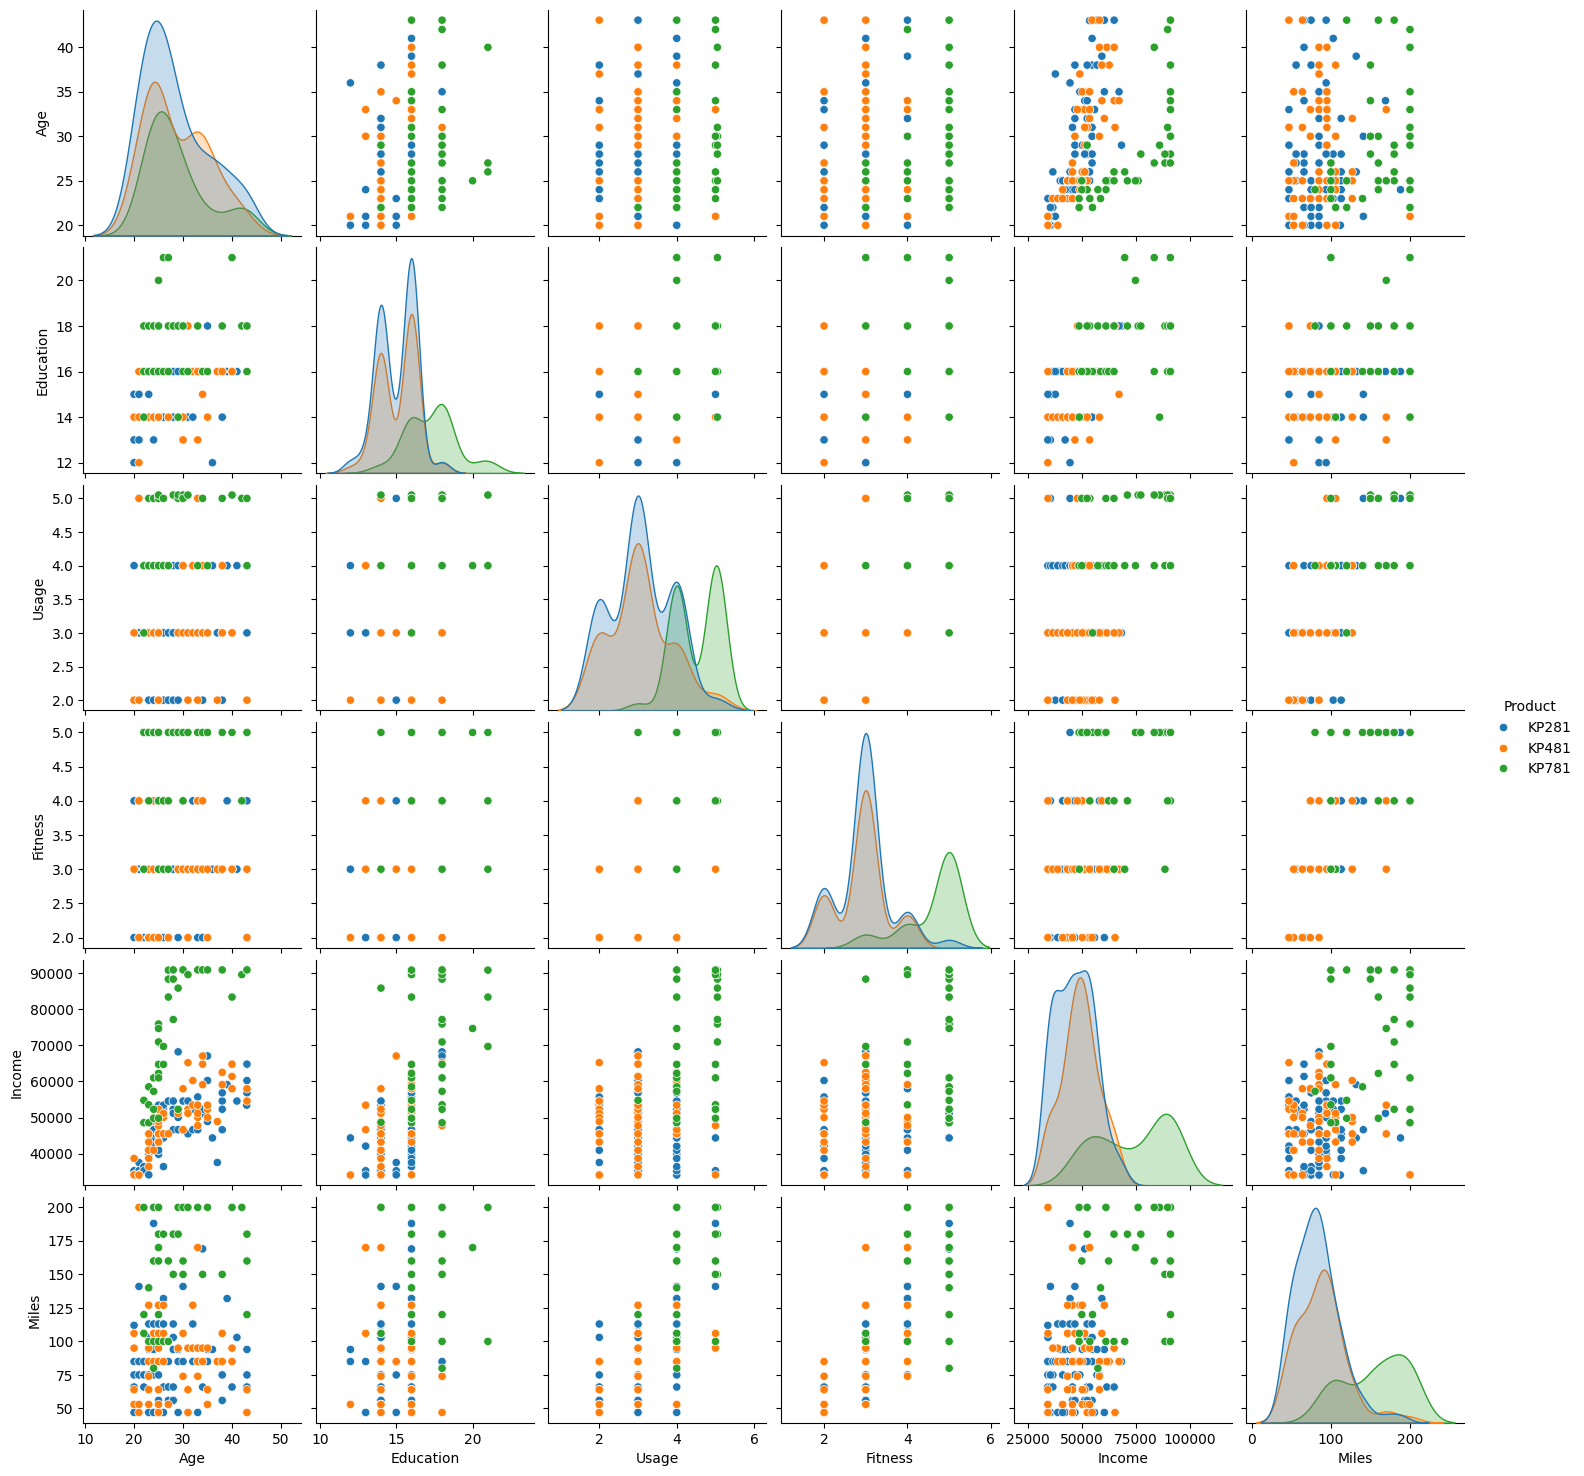

In [388]:
sns.pairplot(df, hue="Product")
plt.show()

# Customer Profiling

In [389]:
# Categorizing user profiles based on income, fitness, and age
def customer_profile(product):
    subset = df[df['Product'] == product]
    print(f"Customer Profile for {product}:")
    print("\nAge Range:", subset['Age'].min(), "-", subset['Age'].max())
    print("Income Range:", subset['Income'].min(), "-", subset['Income'].max())
    print("Income Quantile Range:", subset['Income'].quantile(0.25), "-", subset['Income'].quantile(0.75))
    print("Fitness Level:", subset['Fitness'].value_counts().idxmax())
    print("Usage Frequency:", subset['Usage'].value_counts().idxmax())
    print("Miles Range:", subset['Miles'].min(), "-", subset['Miles'].max())
    print("Miles Quantile Range:", subset['Miles'].quantile(0.25), "-", subset['Miles'].quantile(0.75))
    print("Education Range:", subset['Education'].min(), "-", subset['Education'].max())
    print("Education Quantile Range:", subset['Education'].quantile(0.25), "-", subset['Education'].quantile(0.75))
    print("Marital Status:", subset['MaritalStatus'].value_counts().idxmax())
    print("Gender:", subset['Gender'].value_counts().idxmax())
    print("-----------------------------------")

for product in df['Product'].unique():
    customer_profile(product)

Customer Profile for KP281:

Age Range: 20.0 - 43.04999999999998
Income Range: 34053.15 - 68220.0
Income Quantile Range: 38658.0 - 53439.0
Fitness Level: 3
Usage Frequency: 3.0
Miles Range: 47 - 188
Miles Quantile Range: 66.0 - 94.0
Education Range: 12 - 18
Education Quantile Range: 14.0 - 16.0
Marital Status: Partnered
Gender: Male
-----------------------------------
Customer Profile for KP481:

Age Range: 20.0 - 43.04999999999998
Income Range: 34053.15 - 67083.0
Income Quantile Range: 44911.5 - 53439.0
Fitness Level: 3
Usage Frequency: 3.0
Miles Range: 47 - 200
Miles Quantile Range: 64.0 - 106.0
Education Range: 12 - 18
Education Quantile Range: 14.0 - 16.0
Marital Status: Partnered
Gender: Male
-----------------------------------
Customer Profile for KP781:

Age Range: 22.0 - 43.04999999999998
Income Range: 48556.0 - 90948.24999999999
Income Quantile Range: 58204.75 - 90886.0
Fitness Level: 5
Usage Frequency: 4.0
Miles Range: 80 - 200
Miles Quantile Range: 120.0 - 200.0
Education Ra


### Product KP281 Analysis

Below customers are our target customers:
1. belonging to '23-33' age group
2. Partnered people whose income range lie between 38-54k
3. who rate their fitness levels as 3/5
4. who target 65-94 avg miles per week
5. who plan to use the product 3-4 times each week
6. Education is around 14yrs and 16yrs
7. Most sold product



### Product KP481 Analysis

Below customers are our target customers:
1. belonging to 24-34yrs age group
2. Partnered customers whose income range lie between 45k-54k
3. who rate their fitness levels as 3/5
4. who target 64-106 avg miles per week
5. who plan to use the product 3 times each week
6. Education is around 14yrs and 16yrs
7. Second most sold product



### Product KP781 Analysis

Below customers are our target customers:
1. belonging to '25-30' age group
2. Partnered people whose income range lie between 58k-90k
3. who rate their fitness levels as 4/5
4. who target 120-200 avg miles per week
5. who plan to use the product 4-5 times each week
6. Education is around 16-18yrs
7. Third most sold product

# Marginal Probability

below plots are pdf/pmfs

'P(Product) : '

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


<Axes: xlabel='Product'>

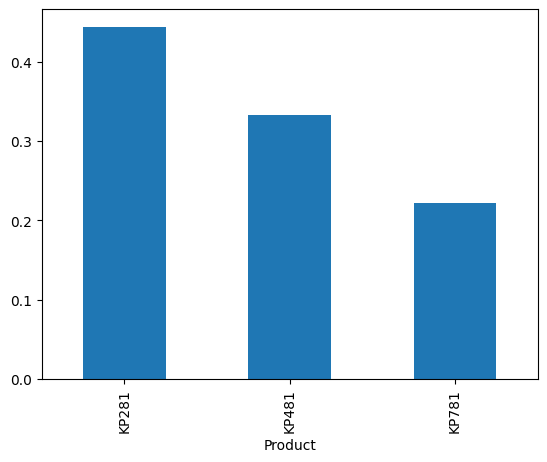

In [390]:
product_distribution = df['Product'].value_counts(normalize=True)
display("P(Product) : ",product_distribution)
product_distribution.sort_index().plot(kind = 'bar')

'P(Gender) : '

,proportion
Gender,
Male,0.577778
Female,0.422222


<Axes: xlabel='Gender'>

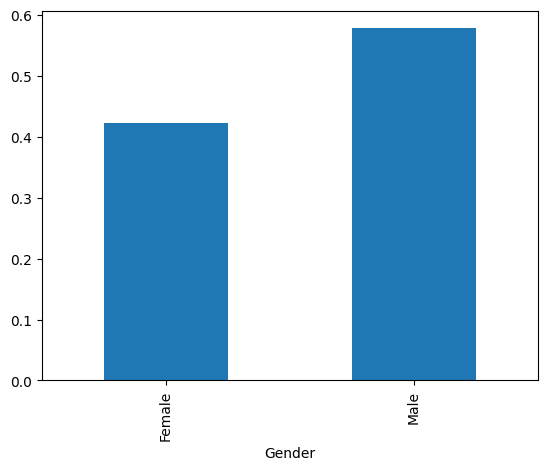

In [391]:
gender_distribution = df['Gender'].value_counts(normalize=True)
display("P(Gender) : ",gender_distribution)
gender_distribution.sort_index().plot(kind = 'bar')

'P(MaritalStatus) : '

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


<Axes: xlabel='MaritalStatus'>

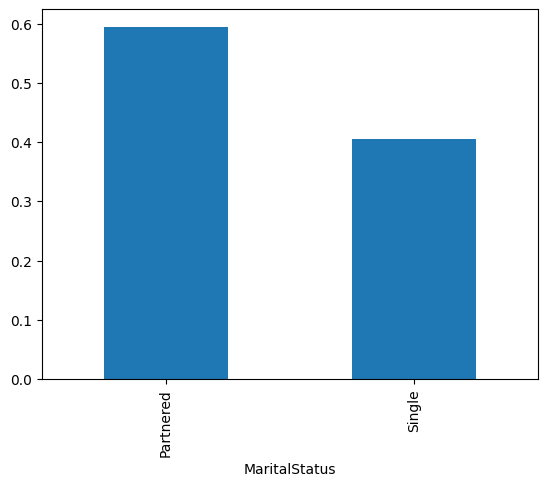

In [392]:
marital_distribution = df['MaritalStatus'].value_counts(normalize = True)
display("P(MaritalStatus) : ",marital_distribution)
marital_distribution.sort_index().plot(kind = 'bar')

'P(Usage) : '

,proportion
Usage,
3.00,0.383333
4.00,0.288889
2.00,0.183333
5.00,0.094444
5.05,0.050000


<Axes: xlabel='Usage'>

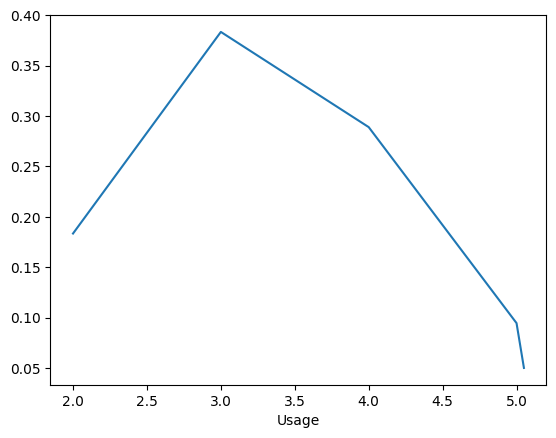

In [393]:
usage_distribution = df['Usage'].value_counts(normalize = True)
display("P(Usage) : ",usage_distribution)
usage_distribution.sort_index().plot()

'P(Fitness) : '

,proportion
Fitness,
3,0.538889
5,0.172222
2,0.155556
4,0.133333


<Axes: xlabel='Fitness'>

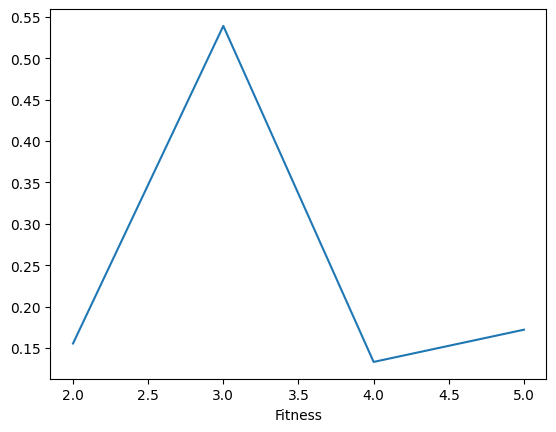

In [394]:
fitness_distribution = df['Fitness'].value_counts(normalize =True)
display("P(Fitness) : ",fitness_distribution)
fitness_distribution.sort_index().plot()

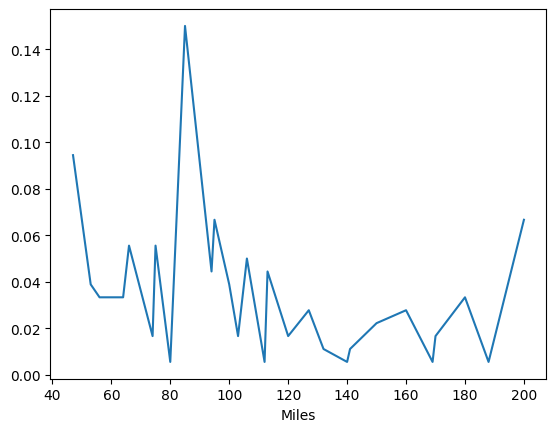

In [395]:
miles_distribution = df['Miles'].value_counts(normalize = True)
# plot with out sorting from value counts
miles_distribution.sort_index().plot()
plt.show()

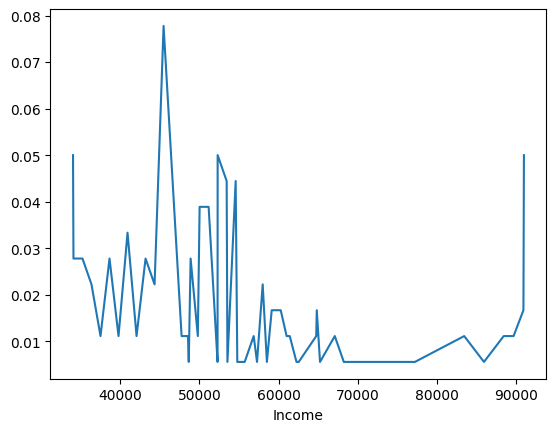

In [396]:
income_distribution = df['Income'].value_counts(normalize = True)
# plot with out sorting from value counts
income_distribution.sort_index().plot()
plt.show()

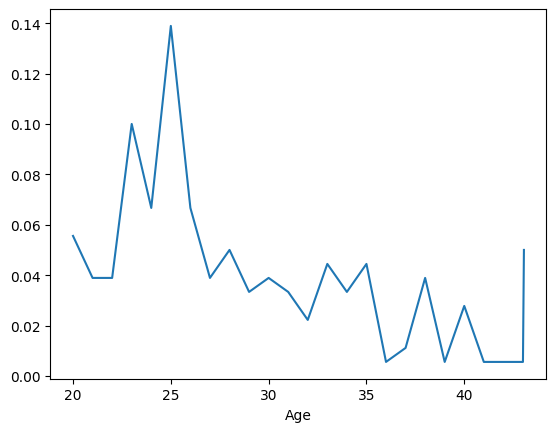

In [397]:
age_distribution = df['Age'].value_counts(normalize = True)
# plot with out sorting from value counts
age_distribution.sort_index().plot()
plt.show()

# Conditional Probability

In [398]:

gender_prob = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='index')
display(gender_prob)

# Given that a customer is male, probability of purchasing each product
display("P(Product | Male):", gender_prob.loc['Male'])

# Given that a customer is female, probability of purchasing each product
display("P(Product | Female):", gender_prob.loc['Female'])


gender_prob = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='columns')
display(gender_prob)

# Given a purchase each product, probability that a customer is male
display("P(Male | Product):", gender_prob.loc['Male'])

# Given a purchase each product, probability that a customer is female
display("P(Female | Product):", gender_prob.loc['Female'])

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


'P(Product | Male):'

,Male
Product,
KP281,0.384615
KP481,0.298077
KP781,0.317308


'P(Product | Female):'

,Female
Product,
KP281,0.526316
KP481,0.381579
KP781,0.092105


Product,KP281,KP481,KP781
Gender,,,
Female,0.5,0.483333,0.175
Male,0.5,0.516667,0.825


'P(Male | Product):'

,Male
Product,
KP281,0.500000
KP481,0.516667
KP781,0.825000


'P(Female | Product):'

,Female
Product,
KP281,0.500000
KP481,0.483333
KP781,0.175000


In [399]:
marital_prob = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], normalize='index')
display(marital_prob)

# Given that a customer is Single, probability of purchasing each product
display("P(Product | Single):", marital_prob.loc['Single'])

# Given that a customer is Partnered, probability of purchasing each product
display("P(Product | Partnered):", marital_prob.loc['Partnered'])


marital_prob = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], normalize='columns')
display(marital_prob)

# Given that a customer is purchasing each product, probability of then being Single
display("P(Single | Product):", marital_prob.loc['Single'])

# Given that a customer is purchasing each product, probability of them being Partnered
display("P(Partnered | Product):", marital_prob.loc['Partnered'])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


'P(Product | Single):'

,Single
Product,
KP281,0.438356
KP481,0.328767
KP781,0.232877


'P(Product | Partnered):'

,Partnered
Product,
KP281,0.448598
KP481,0.336449
KP781,0.214953


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.6,0.6,0.575
Single,0.4,0.4,0.425


'P(Single | Product):'

,Single
Product,
KP281,0.400
KP481,0.400
KP781,0.425


'P(Partnered | Product):'

,Partnered
Product,
KP281,0.600
KP481,0.600
KP781,0.575


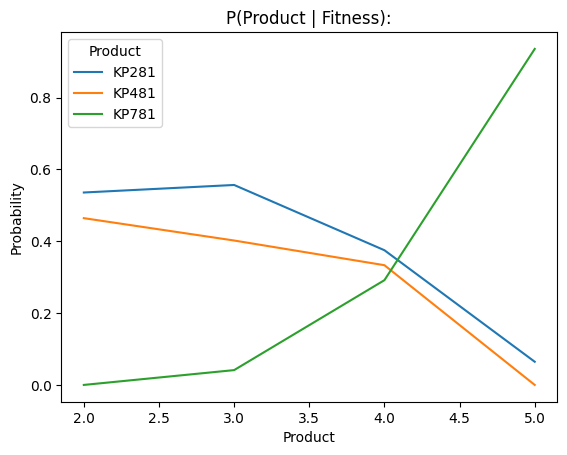

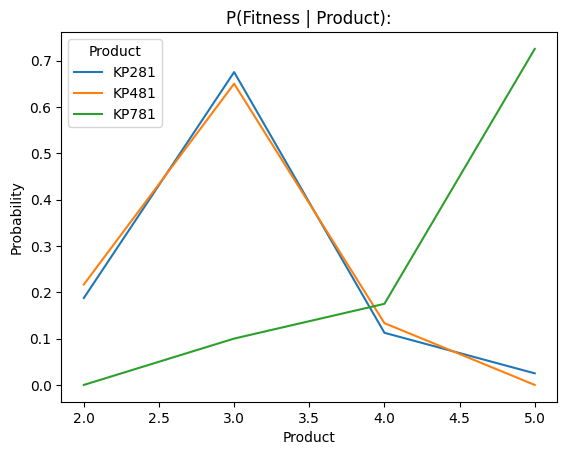

In [400]:
# For Fitness column
fitness_prob = pd.crosstab(index=df['Fitness'], columns=df['Product'], normalize='index')

# Given that a customer has a certain fitness level, probability of purchasing each product
fitness_prob.plot()
plt.title("P(Product | Fitness):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

# Now normalize by columns to get the conditional probability of fitness given the product
fitness_prob_col = pd.crosstab(index=df['Fitness'], columns=df['Product'], normalize='columns')

# Given that a customer is purchasing each product, probability of having a certain fitness level
fitness_prob_col.plot()
plt.title("P(Fitness | Product):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()


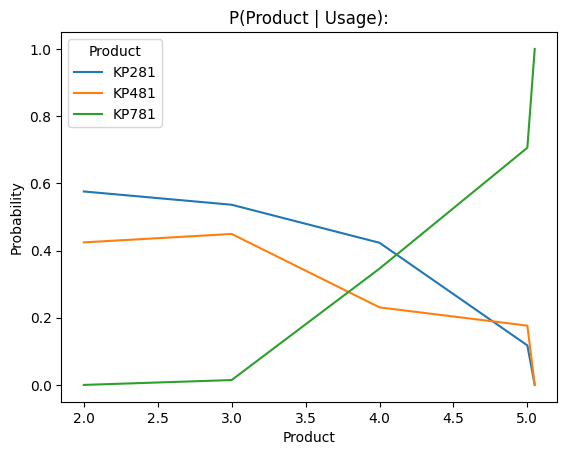

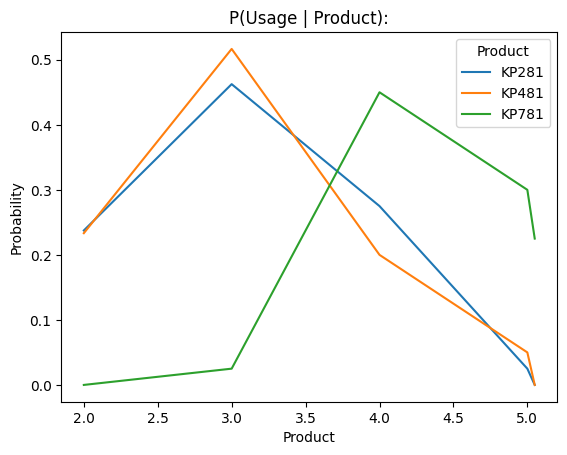

In [401]:
# For Usage column
usage_prob = pd.crosstab(index=df['Usage'], columns=df['Product'], normalize='index')

# Given that a customer has a certain usage level, probability of purchasing each product
usage_prob.plot()
plt.title("P(Product | Usage):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

# Now normalize by columns to get the conditional probability of usage given the product
usage_prob_col = pd.crosstab(index=df['Usage'], columns=df['Product'], normalize='columns')

# Given that a customer is purchasing each product, probability of having a certain usage level
usage_prob_col.plot()
plt.title("P(Usage | Product):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

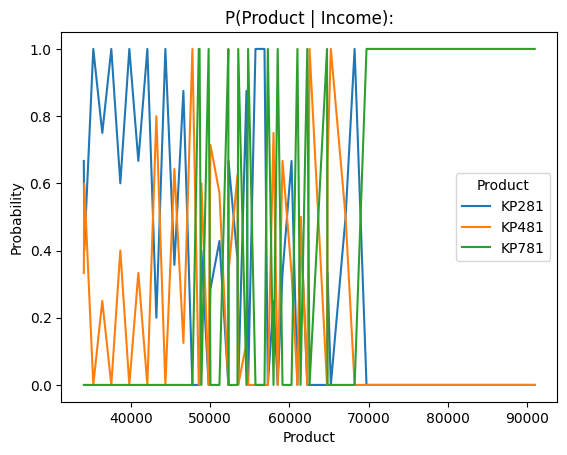

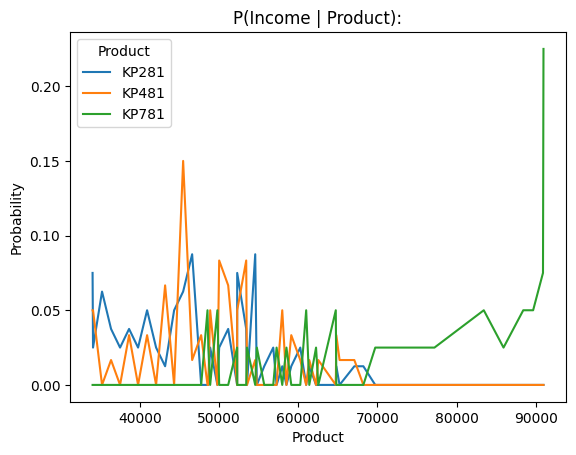

In [402]:
# For Income column
income_prob = pd.crosstab(index=df['Income'], columns=df['Product'], normalize='index')

# Given that a customer has a certain income level, probability of purchasing each product
income_prob.plot()
plt.title("P(Product | Income):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

# Now normalize by columns to get the conditional probability of income given the product
income_prob_col = pd.crosstab(index=df['Income'], columns=df['Product'], normalize='columns')

# Given that a customer is purchasing each product, probability of having a certain income level
income_prob_col.plot()
plt.title("P(Income | Product):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

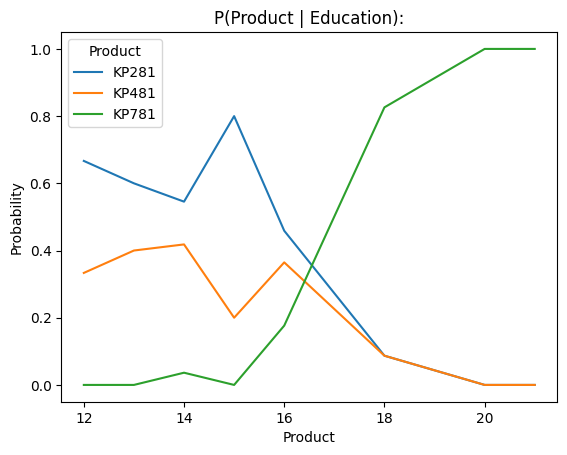

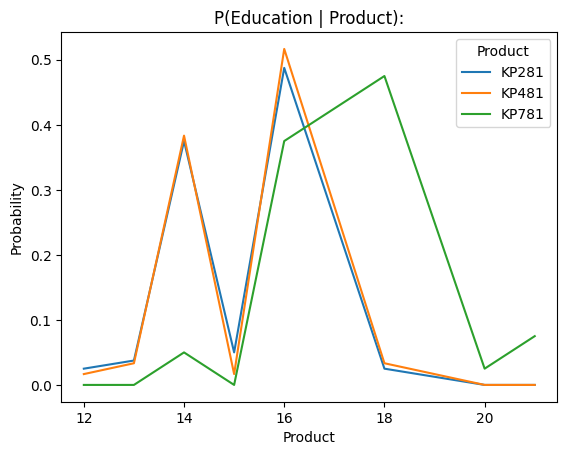

In [403]:
# For Education column
education_prob = pd.crosstab(index=df['Education'], columns=df['Product'], normalize='index')

# Given that a customer has a certain education level, probability of purchasing each product
education_prob.plot()
plt.title("P(Product | Education):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

# Now normalize by columns to get the conditional probability of education given the product
education_prob_col = pd.crosstab(index=df['Education'], columns=df['Product'], normalize='columns')

# Given that a customer is purchasing each product, probability of having a certain education level
education_prob_col.plot()
plt.title("P(Education | Product):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

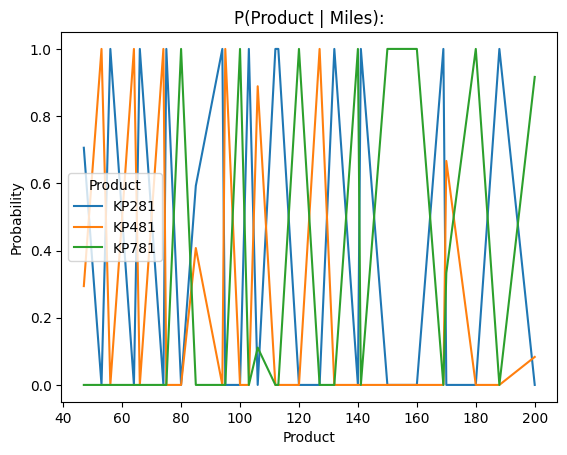

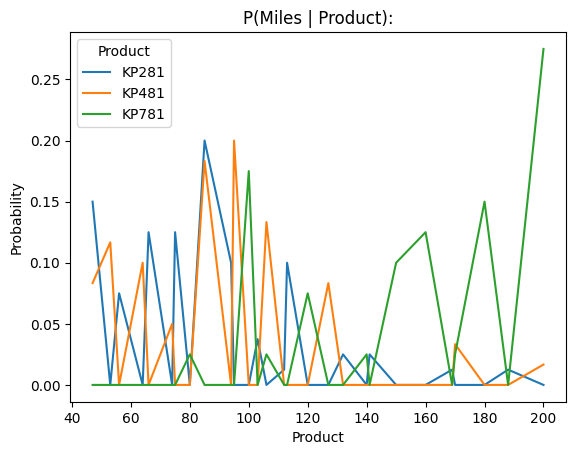

In [404]:
# For Miles column
miles_prob = pd.crosstab(index=df['Miles'], columns=df['Product'], normalize='index')

# Given that a customer has traveled a certain number of miles, probability of purchasing each product
miles_prob.plot()
plt.title("P(Product | Miles):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()

# Now normalize by columns to get the conditional probability of miles given the product
miles_prob_col = pd.crosstab(index=df['Miles'], columns=df['Product'], normalize='columns')

# Given that a customer is purchasing each product, probability of having traveled a certain number of miles
miles_prob_col.plot()
plt.title("P(Miles | Product):")
plt.xlabel('Product')
plt.ylabel('Probability')
plt.show()
